In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1.データ読込

In [7]:
# キノコードデータ
train = pd.read_csv("train.csv")   # 学習用データ
test = pd.read_csv("test.csv")   # 評価用データ

# trainデータ testデータ結合
df = pd.concat([train, test], ignore_index=True, sort=False)
df = df.sort_values("ID")
df = df.reset_index(drop=True)

In [8]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [9]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
1,19,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown
2,25,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown
3,29,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown
4,35,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown


In [10]:
#データ要約
train.describe(include="all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,40211.000000,40211.000000,40211,40211,40211,40211,40211.000000,40211,40211,40211,40211.000000,40211,40211.000000,40211.000000,40211.000000,40211.000000,40211,40211
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,8642,24160,20624,39488,NaN,22335,33790,26088,NaN,12254,NaN,NaN,NaN,NaN,32855,35499
mean,22624.703788,40.932208,NaN,NaN,NaN,NaN,1369.058442,NaN,NaN,NaN,15.809480,NaN,258.614459,2.754744,40.294372,0.585039,NaN,NaN
std,13032.800177,10.621005,NaN,NaN,NaN,NaN,3063.726303,NaN,NaN,NaN,8.330412,NaN,259.249038,3.102956,100.240920,2.366232,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11345.500000,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22683.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33891.500000,48.000000,NaN,NaN,NaN,NaN,1433.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN,NaN


#### 1.1データ要約(yes)

In [11]:
#目的変数（'yes'）のデータ要約
train[train['y'] == 'yes'].describe(include="all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4712.000000,4712.000000,4712,4712,4712,4712,4712.000000,4712,4712,4712,4712.000000,4712,4712.000000,4712.000000,4712.000000,4712.000000,4712,4712
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,1
top,NaN,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,yes
freq,NaN,NaN,1155,2458,2181,4667,NaN,2994,4283,3904,NaN,827,NaN,NaN,NaN,NaN,3030,4712
mean,33202.128608,41.607173,NaN,NaN,NaN,NaN,1828.588922,NaN,NaN,NaN,15.176995,NaN,539.700976,2.144100,68.097199,1.167657,NaN,NaN
std,11831.207861,13.465065,NaN,NaN,NaN,NaN,3594.772110,NaN,NaN,NaN,8.512759,NaN,394.405226,1.942342,118.346395,2.584819,NaN,NaN
min,84.000000,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,NaN,8.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,26576.500000,31.000000,NaN,NaN,NaN,NaN,206.000000,NaN,NaN,NaN,8.000000,NaN,244.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,38414.000000,38.000000,NaN,NaN,NaN,NaN,718.500000,NaN,NaN,NaN,15.000000,NaN,430.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,42627.250000,50.000000,NaN,NaN,NaN,NaN,2166.000000,NaN,NaN,NaN,22.000000,NaN,728.000000,3.000000,98.000000,1.000000,NaN,NaN


#### 1.2データ要約(no)

In [12]:
#目的変数（'no'）のデータ要約
train[train['y'] == 'no'].describe(include="all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,35499.000000,35499.000000,35499,35499,35499,35499,35499.000000,35499,35499,35499,35499.000000,35499,35499.000000,35499.000000,35499.000000,35499.000000,35499,35499
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,1
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,8011,21702,18443,34821,NaN,20617,29507,22184,NaN,11427,NaN,NaN,NaN,NaN,29825,35499
mean,21220.697315,40.842615,NaN,NaN,NaN,NaN,1308.062143,NaN,NaN,NaN,15.893434,NaN,221.304121,2.835798,36.603933,0.507704,NaN,NaN
std,12530.009274,10.180834,NaN,NaN,NaN,NaN,2980.883743,NaN,NaN,NaN,8.302407,NaN,208.824466,3.217087,96.990074,2.324768,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,10360.500000,33.000000,NaN,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,8.000000,NaN,95.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,21057.000000,39.000000,NaN,NaN,NaN,NaN,419.000000,NaN,NaN,NaN,16.000000,NaN,164.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,31778.500000,48.000000,NaN,NaN,NaN,NaN,1350.500000,NaN,NaN,NaN,21.000000,NaN,278.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         40211 non-null  int64 
 1   age        40211 non-null  int64 
 2   job        40211 non-null  object
 3   marital    40211 non-null  object
 4   education  40211 non-null  object
 5   default    40211 non-null  object
 6   balance    40211 non-null  int64 
 7   housing    40211 non-null  object
 8   loan       40211 non-null  object
 9   contact    40211 non-null  object
 10  day        40211 non-null  int64 
 11  month      40211 non-null  object
 12  duration   40211 non-null  int64 
 13  campaign   40211 non-null  int64 
 14  pdays      40211 non-null  int64 
 15  previous   40211 non-null  int64 
 16  poutcome   40211 non-null  object
 17  y          40211 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.5+ MB


In [14]:
test.describe(include="all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,5000.000000,5000.000000,5000,5000,5000,5000,5000.000000,5000,5000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,NaN,1090,3054,2578,4908,NaN,2795,4177,3197,NaN,1512,NaN,NaN,NaN,NaN,4104
mean,22455.580400,40.968400,NaN,NaN,NaN,NaN,1307.694600,NaN,NaN,NaN,15.781800,NaN,254.533000,2.837000,39.421400,0.542400,NaN
std,13200.703911,10.601711,NaN,NaN,NaN,NaN,2887.471853,NaN,NaN,NaN,8.259167,NaN,243.237157,3.057368,99.228538,1.716622,NaN
min,4.000000,19.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN
25%,10977.750000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,21885.000000,39.000000,NaN,NaN,NaN,NaN,438.000000,NaN,NaN,NaN,16.000000,NaN,179.000000,2.000000,-1.000000,0.000000,NaN
75%,34135.000000,49.000000,NaN,NaN,NaN,NaN,1379.750000,NaN,NaN,NaN,21.000000,NaN,321.000000,3.000000,-1.000000,0.000000,NaN


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5000 non-null   int64 
 1   age        5000 non-null   int64 
 2   job        5000 non-null   object
 3   marital    5000 non-null   object
 4   education  5000 non-null   object
 5   default    5000 non-null   object
 6   balance    5000 non-null   int64 
 7   housing    5000 non-null   object
 8   loan       5000 non-null   object
 9   contact    5000 non-null   object
 10  day        5000 non-null   int64 
 11  month      5000 non-null   object
 12  duration   5000 non-null   int64 
 13  campaign   5000 non-null   int64 
 14  pdays      5000 non-null   int64 
 15  previous   5000 non-null   int64 
 16  poutcome   5000 non-null   object
dtypes: int64(8), object(9)
memory usage: 664.2+ KB


In [16]:
#欠損値の確認
train.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#2.データの可視化(EDA)
yes：定期預金に加入（target層）\
no ：定期預金に未加入


#### 2.1 age：年齢


/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3541621463.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['y']=='no']['age'],kde=False,label='no',color="blue")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3541621463.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

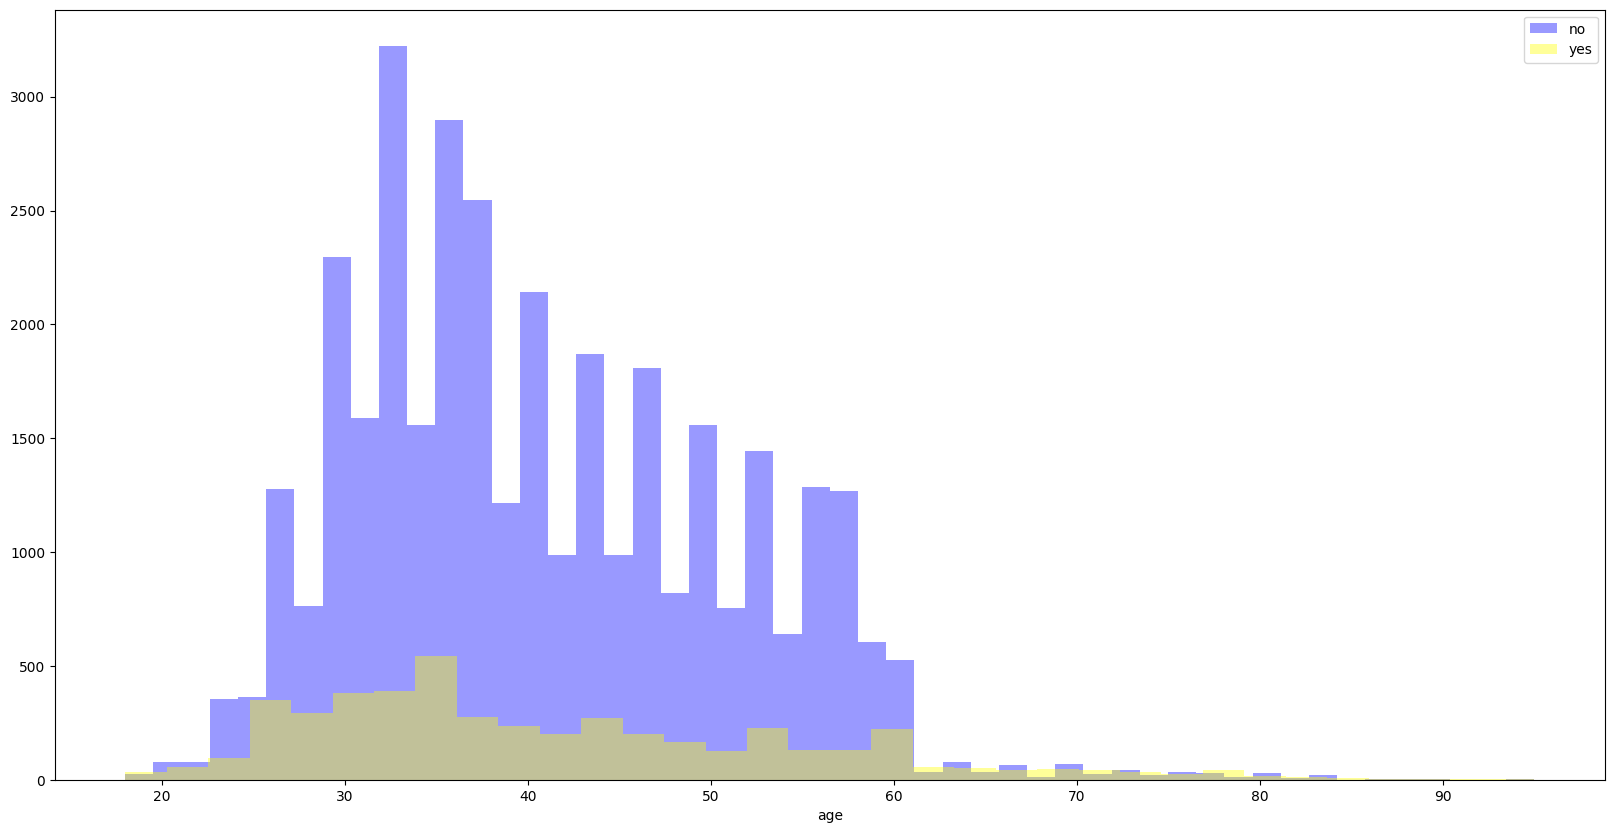

In [18]:
# 種類：　
# yes 平均値：41.6歳、標準偏差：13.4歳、最大値：95歳、最小値：18歳　(target層)
# no　　　平均値：40.8歳、標準偏差：10.1歳、最大値：95歳、最小値：18歳
# 下記図を参考に新しい特徴量を追加
# 「senier」：６１歳以上

fig= plt.subplots(figsize=(20,10))
sns.distplot(train[train['y']=='no']['age'],kde=False,label='no',color="blue")
sns.distplot(train[train['y']=='yes']['age'],kde=False,label='yes',color="yellow")
plt.legend();
#60歳以上の高齢者はyesが多そう

#### 2.2 job：仕事

job            y  
admin.         no     3993
               yes     561
blue-collar    no     8011
               yes     631
entrepreneur   no     1209
               yes     112
housemaid      no     1005
               yes      92
management     no     7303
               yes    1155
retired        no     1556
               yes     450
self-employed  no     1237
               yes     169
services       no     3343
               yes     333
student        no      602
               yes     235
technician     no     6033
               yes     757
unemployed     no      980
               yes     185
unknown        no      227
               yes      32
Name: ID, dtype: int64

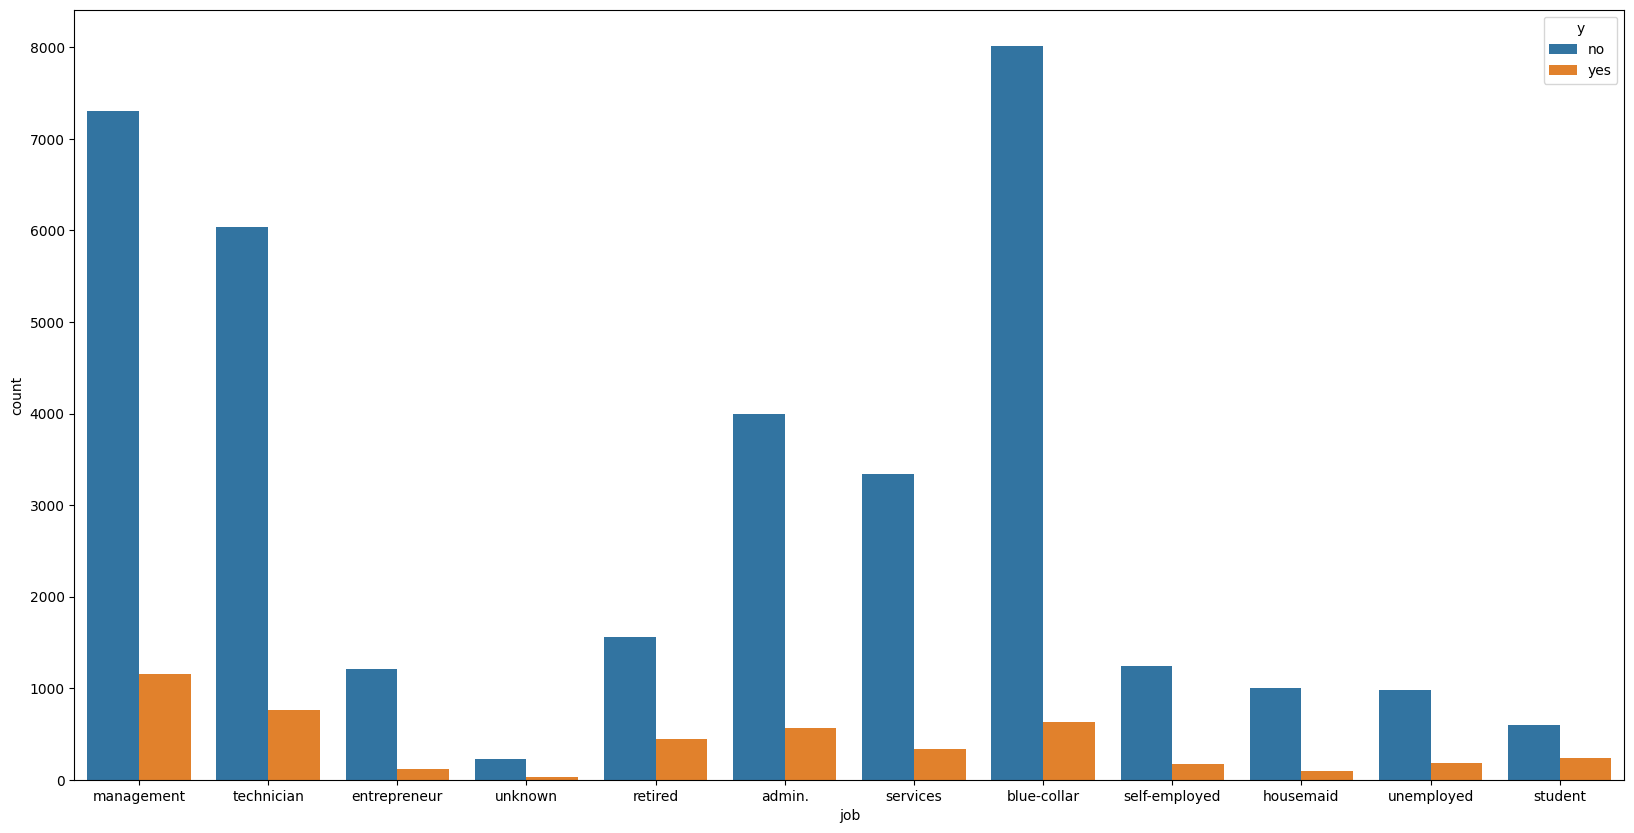

In [19]:
# 種類： １２種類
# yes 平均値：3.0、標準偏差：2.9、最大値：11、最小値：0　(target層)
# no　　　平均値：2.6、標準偏差：2.6、最大値：11、最小値：0
# 0.management:部長、1.blue-collar：現場作業員（肉体労働）、2.technician:専門家・技術者、3.admin：：事務職、4.services：サービス業、5.retired：退職、
# 6.self-employed：自営業、7.entrepreneur:起業家、8.unemployed：失業者、9.housemaid：家政婦、10.student：学生、11.unknown：不明

fig= plt.subplots(figsize=(20,10))
sns.countplot(x='job',hue='y',data=train);
train.groupby(["job","y"]).count()["ID"]
#blue-collerとservicesはnoが多い傾向

#### 2.3 marital：婚姻

marital   y  
divorced  no      4076
          yes      558
married   no     21702
          yes     2458
single    no      9721
          yes     1696
Name: ID, dtype: int64

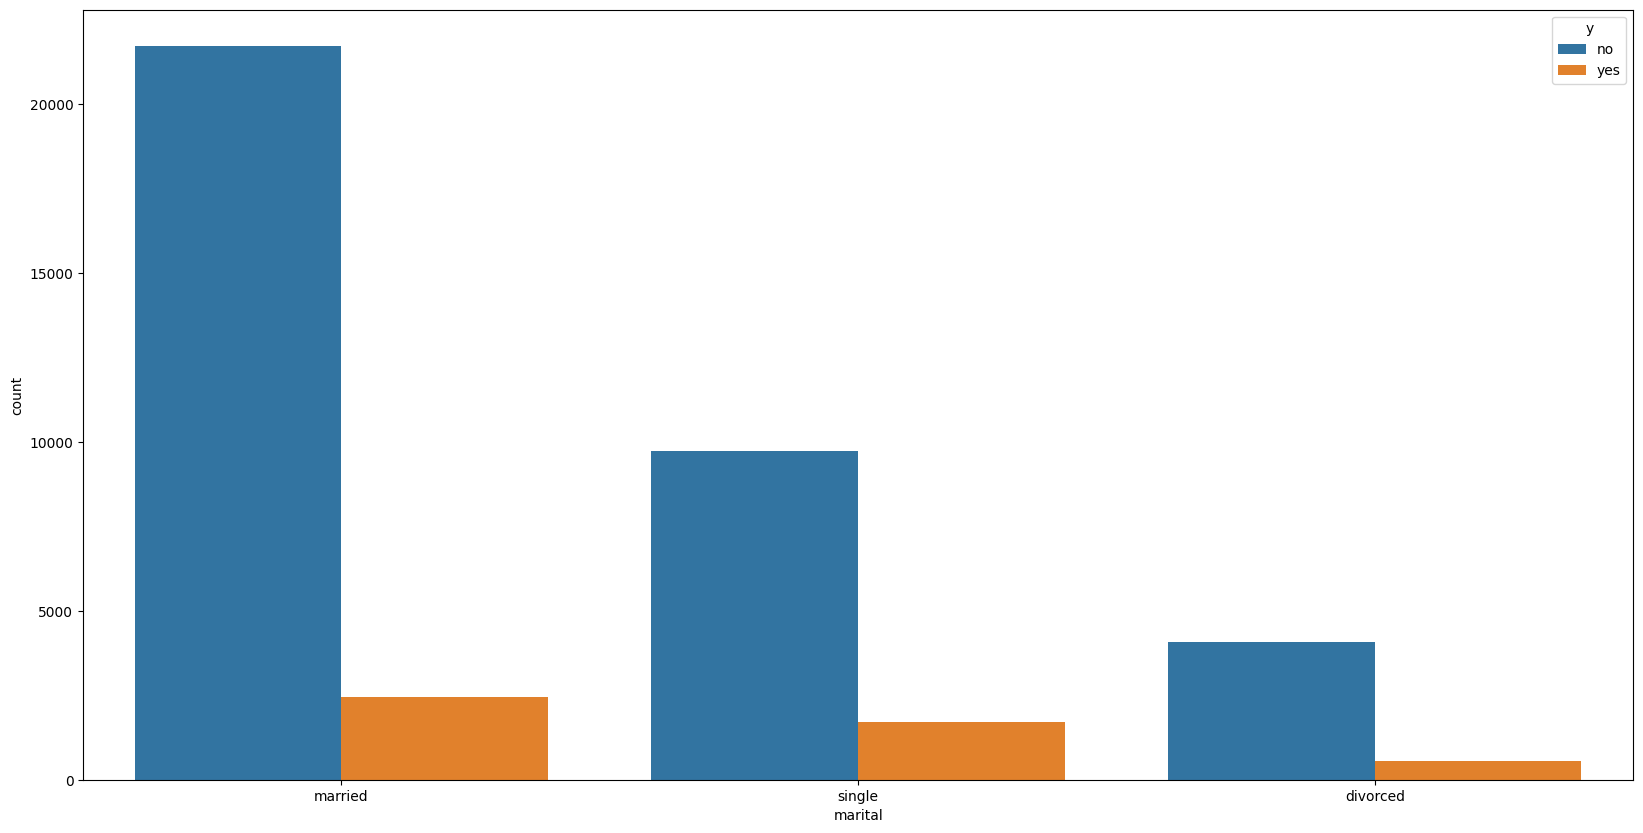

In [20]:
# 種類：　３種類
# yes 平均値：0.59、標準偏差：0.69、最大値：2、最小値：0　(target層)
# no　　　平均値：0.50、標準偏差：0.69、最大値：2、最小値：0
# 0.married：結婚, 1.single：独身, 2.divorced:未亡人
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='marital',hue='y',data=train);
train.groupby(["marital","y"]).count()["ID"]
#singleはyesが多い傾向

#### 2.4 education：教育

education  y  
primary    no      5548
           yes      534
secondary  no     18443
           yes     2181
tertiary   no     10077
           yes     1776
unknown    no      1431
           yes      221
Name: ID, dtype: int64

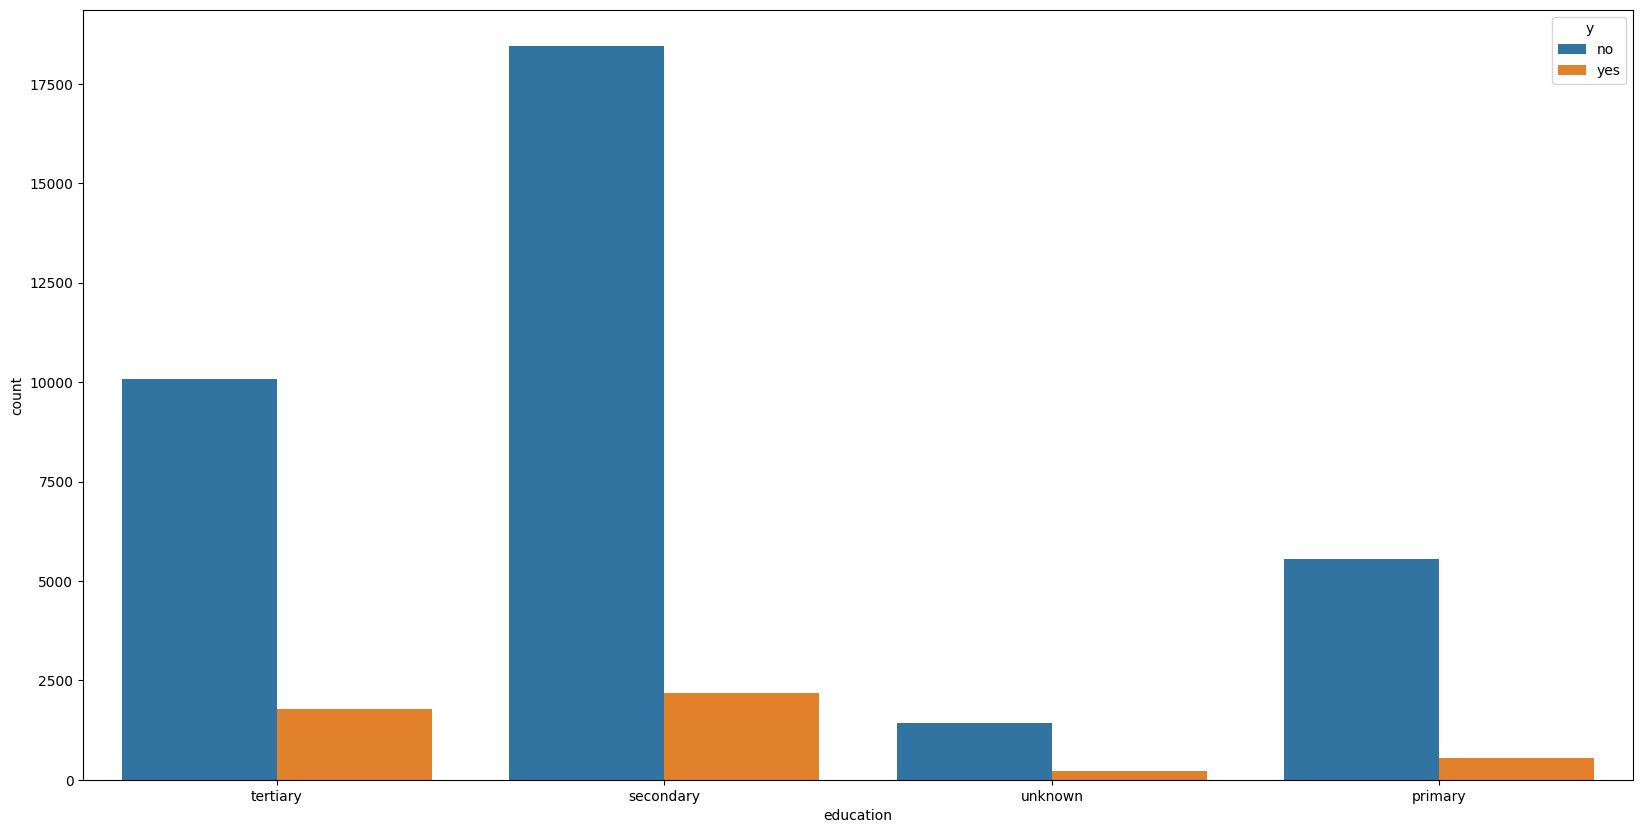

In [21]:
# 種類：　4種類
# yes 平均値：41.6歳、標準偏差：13.4歳、平均値：41.6歳、最大値：　　95歳、最小値：　18歳　(target層)
# no　　　平均値：　40.8歳、標準偏差：10.1歳、平均値：40.8歳、最大値：　　95歳、最小値：　18歳
# tertiary：高校、secondary:中学校、primary：小学校、unknown：不明
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='education',hue='y',data=train);
train.groupby(["education","y"]).count()["ID"]
#tertiaryはyesが多い傾向

#### 2.5 default：債務整理者

default  y  
no       no     34821
         yes     4667
yes      no       678
         yes       45
Name: ID, dtype: int64

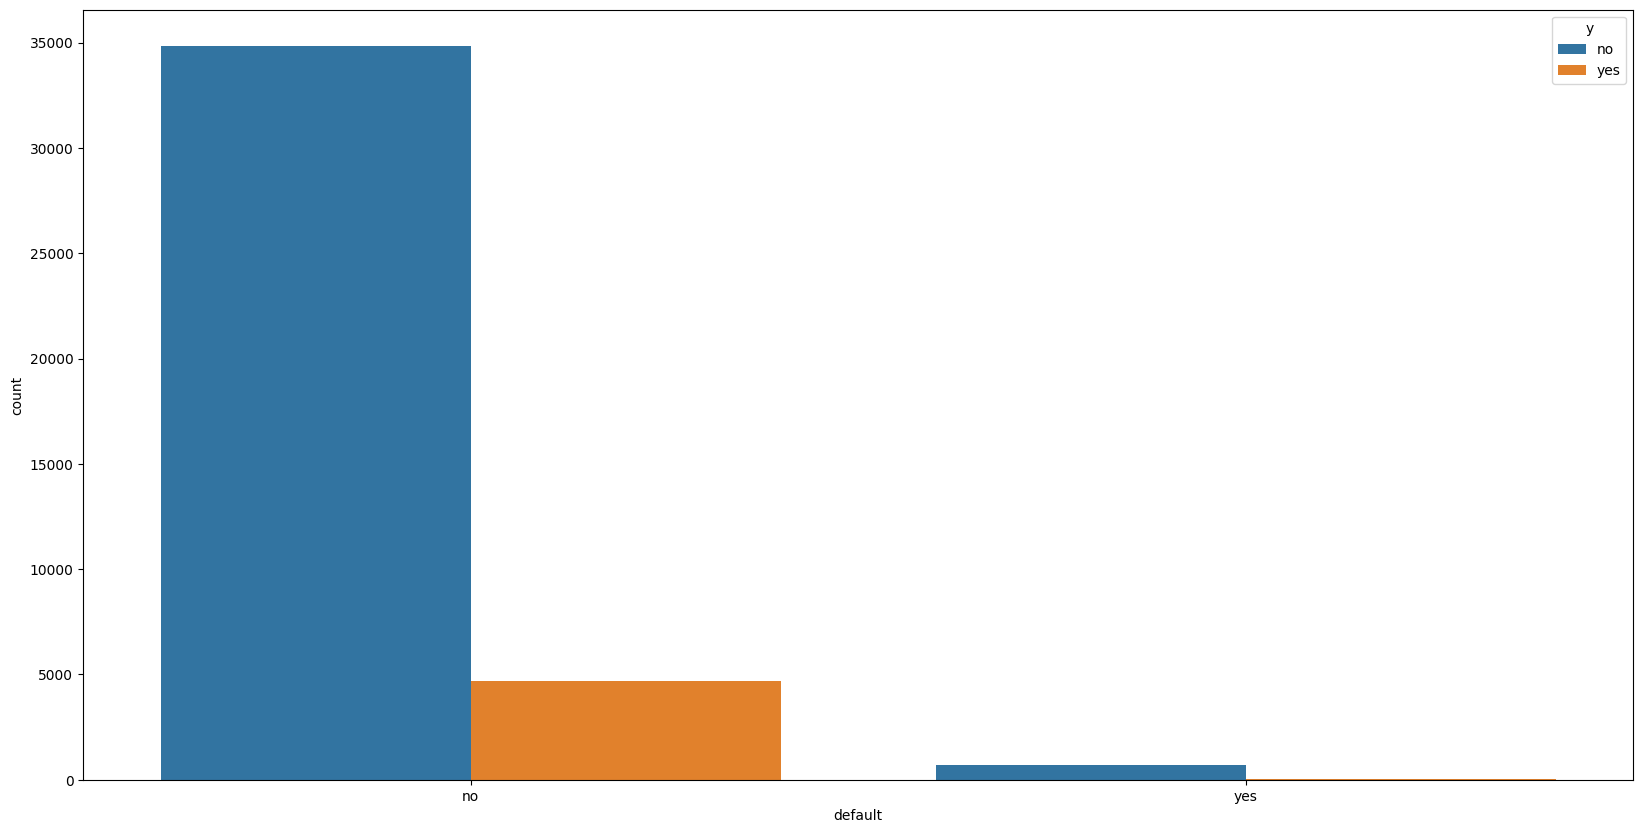

In [22]:
# 種類：　２種類
# yes 平均値：0.00、標準偏差：0.09、最大値：1、最小値：0　(target層)
# no　　　平均値：0.01、標準偏差：0.13、最大値：1、最小値：0
#　　no：債務整理なし、yes:債務整理あり
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='default',hue='y',data=train);
train.groupby(["default","y"]).count()["ID"]
#yesの人はnoが多い傾向

#### 2.6 balance：年間残高

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3208015961.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['y']=='no']['balance'],kde=False,label='no',color="blue")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3208015961.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

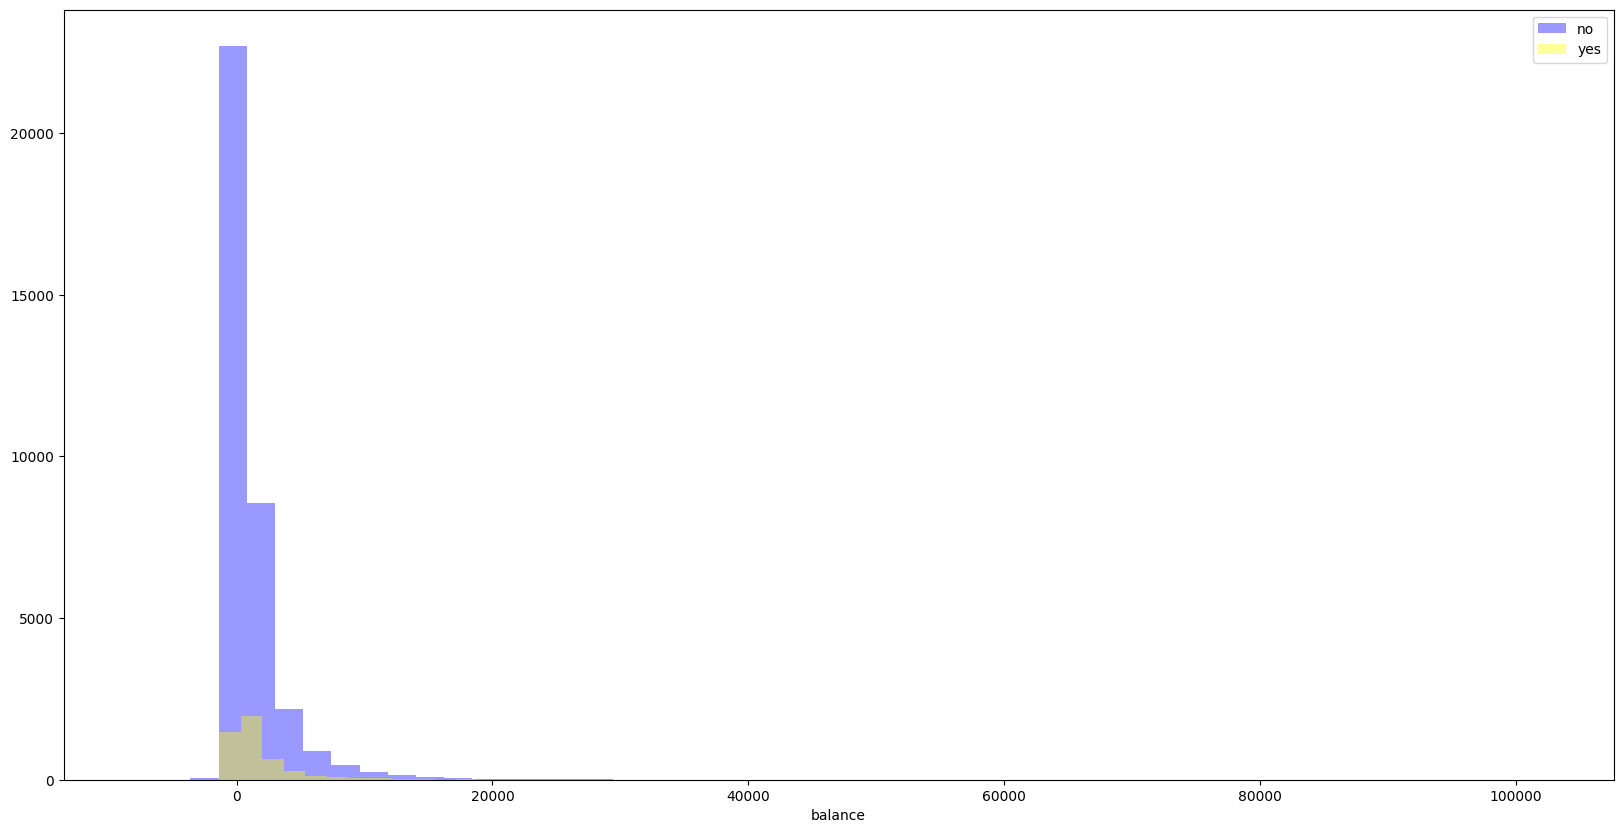

In [23]:
# 種類
# yes 平均値：1828、標準偏差：3594、最大値：　　 81204、最小値：　-3058　(target層)
# no　　　平均値：1308、標準偏差：2980、最大値：　　102127、最小値：　-8019
fig= plt.subplots(figsize=(20,10))
sns.distplot(train[train['y']=='no']['balance'],kde=False,label='no',color="blue")
sns.distplot(train[train['y']=='yes']['balance'],kde=False,label='yes',color="yellow")
plt.legend();

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/195959273.py:3: RuntimeWarning: divide by zero encountered in log
  sns.distplot(train[train['y']=='no']['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x))), label="no")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/195959273.py:3: RuntimeWarning: invalid value encountered in double_scalars
  sns.distplot(train[train['y']=='no']['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x))), label="no")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/195959273.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['y']=='no']['balanc

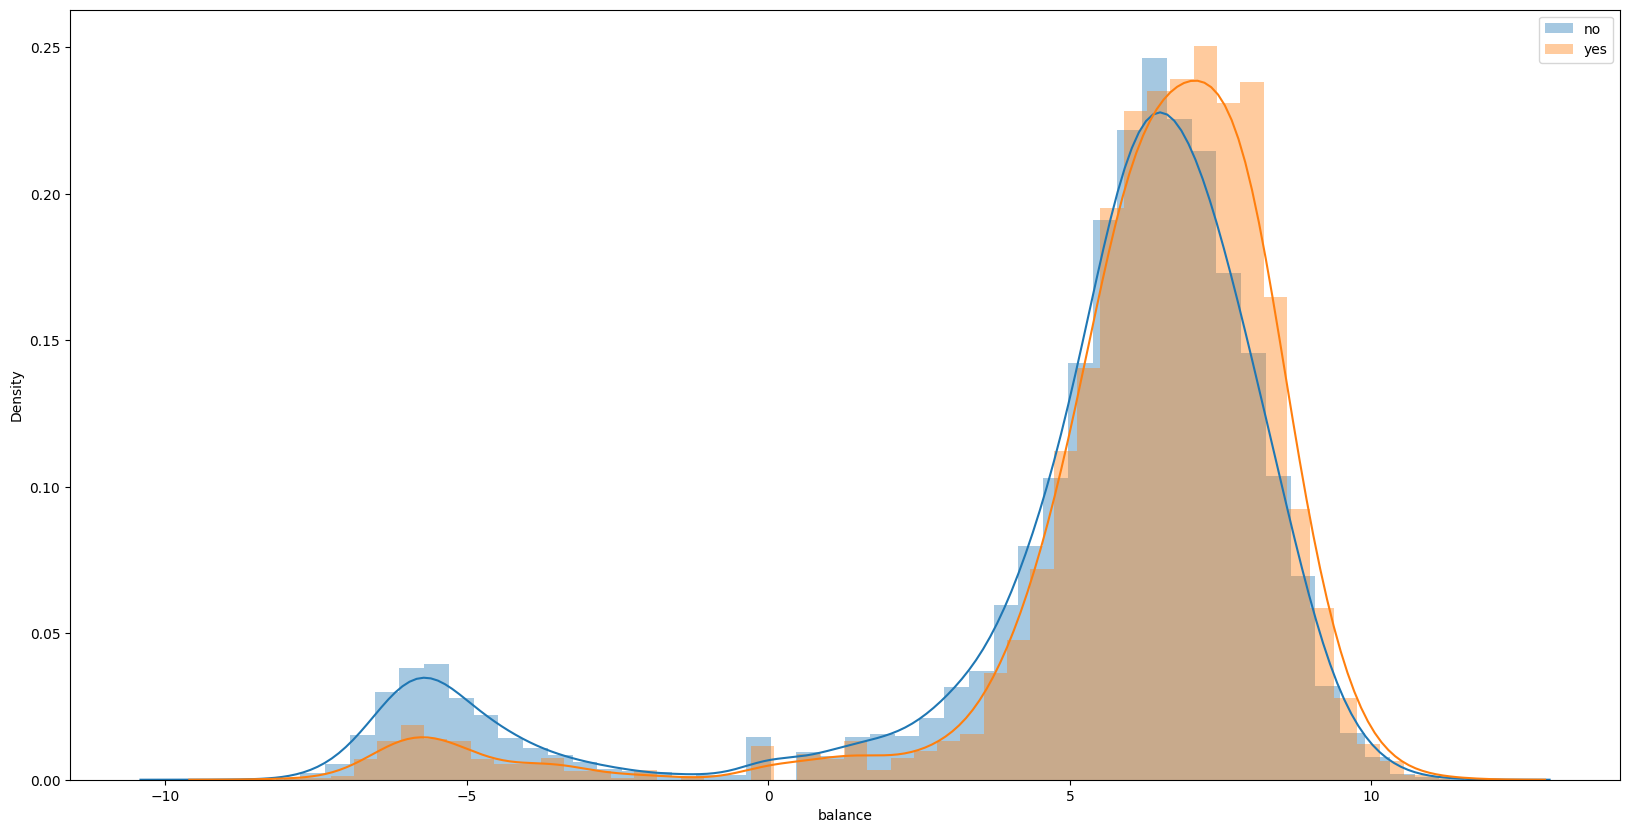

In [24]:
# 絶対値の対数を取ってから元の符号を付加する(対象が整数かつ負の数を含む連続変数の場合のみ使用可能な方法)
fig= plt.subplots(figsize=(20,10))
sns.distplot(train[train['y']=='no']['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x))), label="no")
sns.distplot(train[train['y']=='yes']['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x))), label="yes")
plt.legend();
#残高が多いほどyesになる傾向

#### 2.7 housing：住宅ローン

housing  y  
no       no     14882
         yes     2994
yes      no     20617
         yes     1718
Name: ID, dtype: int64

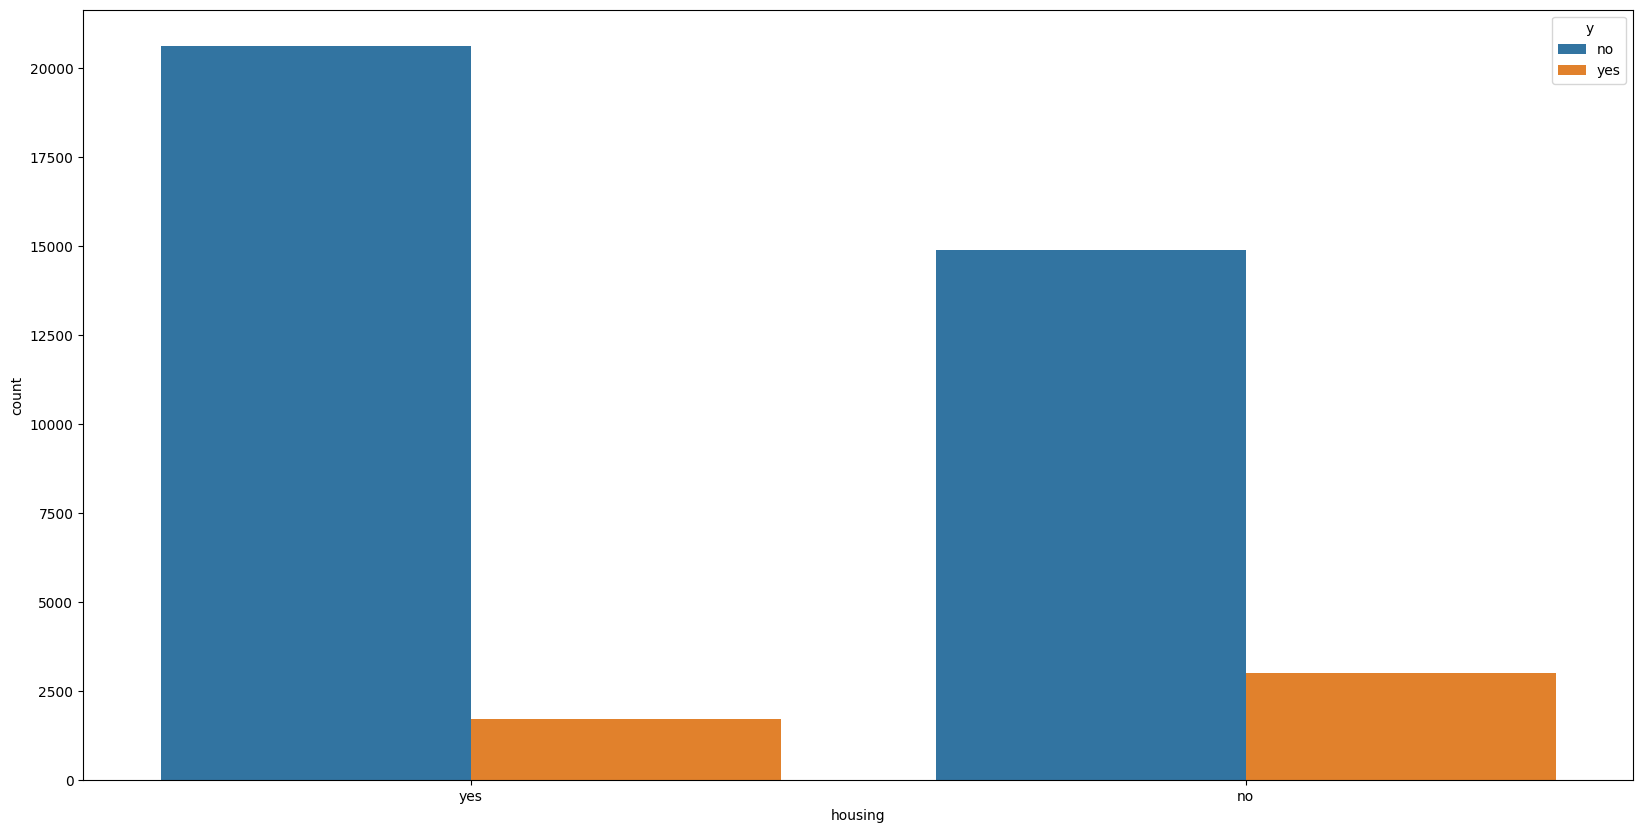

In [25]:
# 種類：　2種類
# yes 平均値：41.6歳、標準偏差：13.4歳、平均値：41.6歳、最大値：　　95歳、最小値：　18歳　(target層)
# no　　　平均値：　40.8歳、標準偏差：10.1歳、平均値：40.8歳、最大値：　　95歳、最小値：　18歳
# yes：住宅ローンあり, no：住宅ローンなし
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='housing',hue='y',data=train);
train.groupby(["housing","y"]).count()["ID"]
#住宅ローンがないとyesが多い傾向

#### 2.8 loan：ローンの有無

loan  y  
no    no     29507
      yes     4283
yes   no      5992
      yes      429
Name: ID, dtype: int64

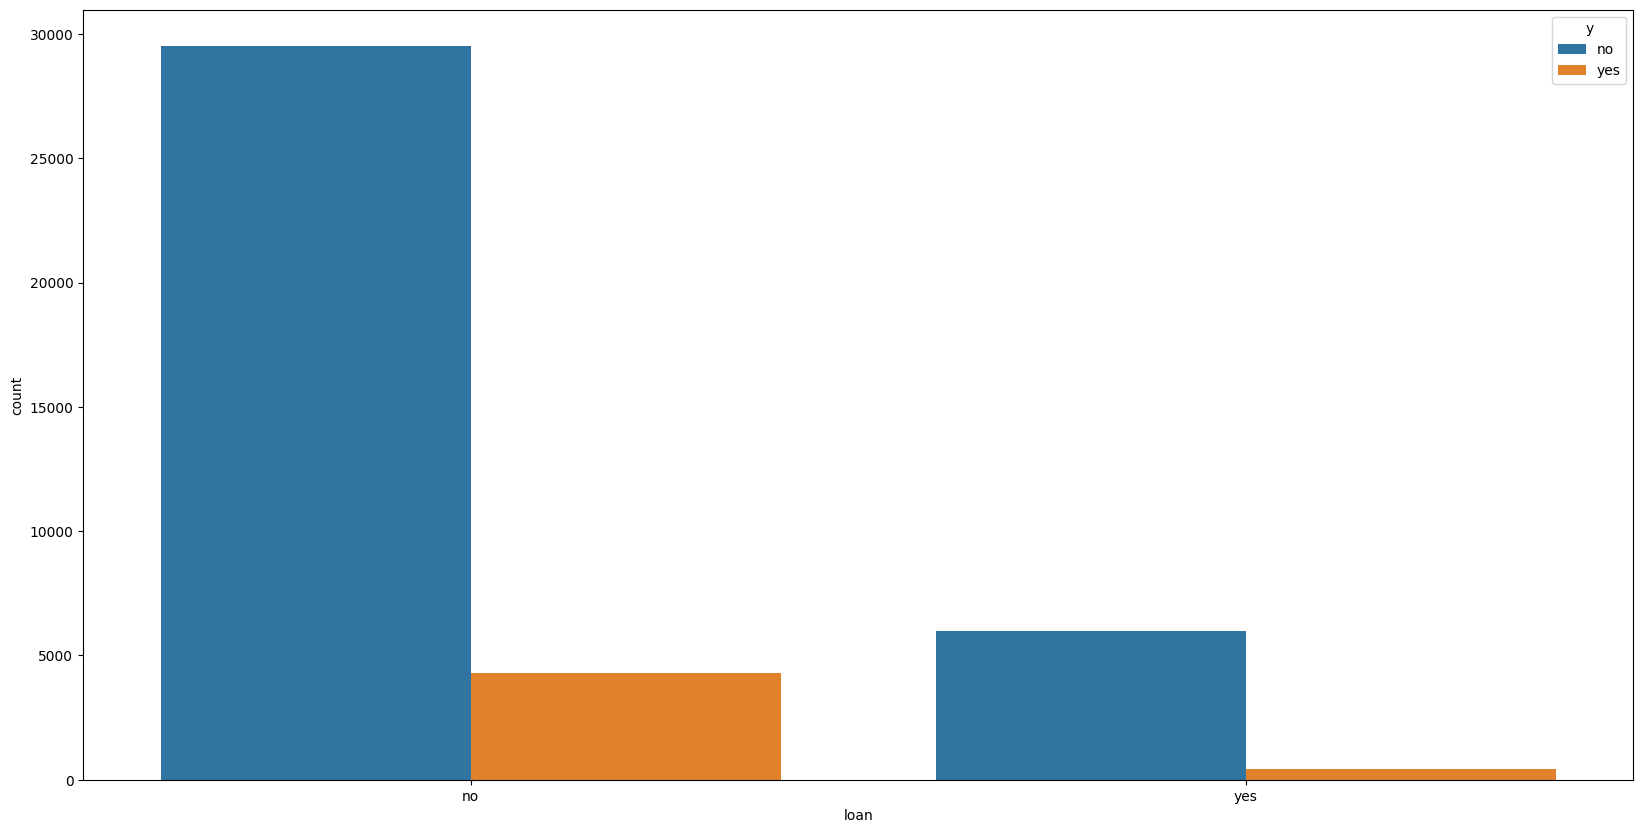

In [26]:
# 種類：　2種類
# yes 平均値：41.6歳、標準偏差：13.4歳、平均値：41.6歳、最大値：　　95歳、最小値：　18歳　(target層)
# no　　　平均値：　40.8歳、標準偏差：10.1歳、平均値：40.8歳、最大値：　　95歳、最小値：　18歳
# yes：ローンあり, no：ローンなし
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='loan',hue='y',data=train);
train.groupby(["loan","y"]).count()["ID"]
#ローンがないとyesが多い傾向

#### 2.9 contact：連絡手段の通信手段

contact    y  
cellular   no     22184
           yes     3904
telephone  no      2270
           yes      343
unknown    no     11045
           yes      465
Name: ID, dtype: int64

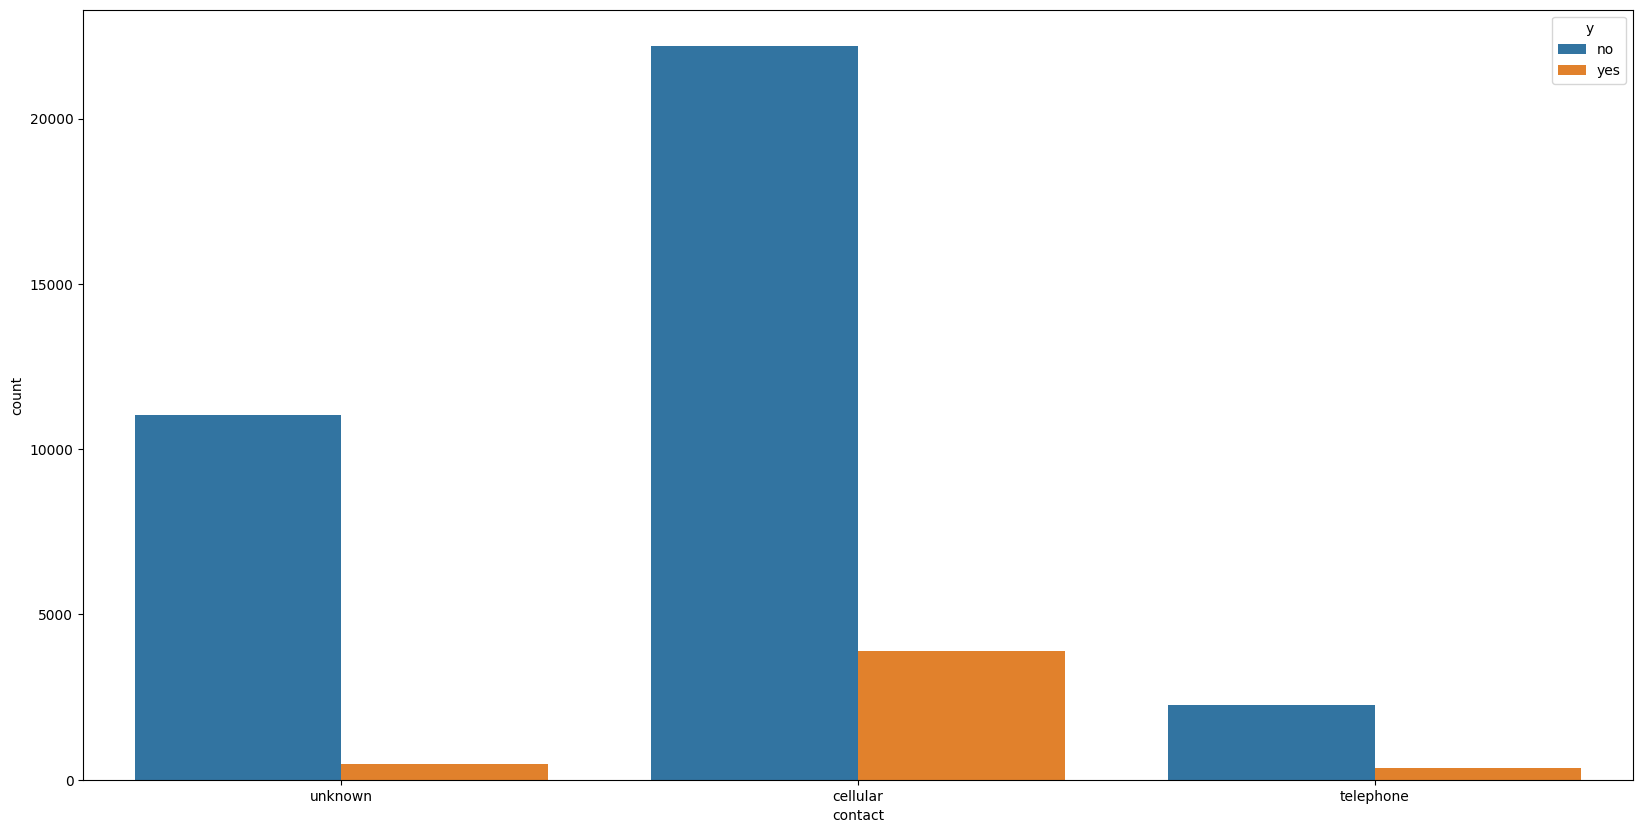

In [27]:
# 種類：　3種類
# yes 平均値：41.6歳、標準偏差：13.4歳、平均値：41.6歳、最大値：　　95歳、最小値：　18歳　(target層)
# no　　　平均値：　40.8歳、標準偏差：10.1歳、平均値：40.8歳、最大値：　　95歳、最小値：　18歳
# unknown：不明、cellular:携帯電話、telephone:固定電話

fig= plt.subplots(figsize=(20,10))
sns.countplot(x='contact',hue='y',data=train);
train.groupby(["contact","y"]).count()["ID"]
#cellularはyesが多い傾向

#### 2.10 day：月の最後の連絡日（日）

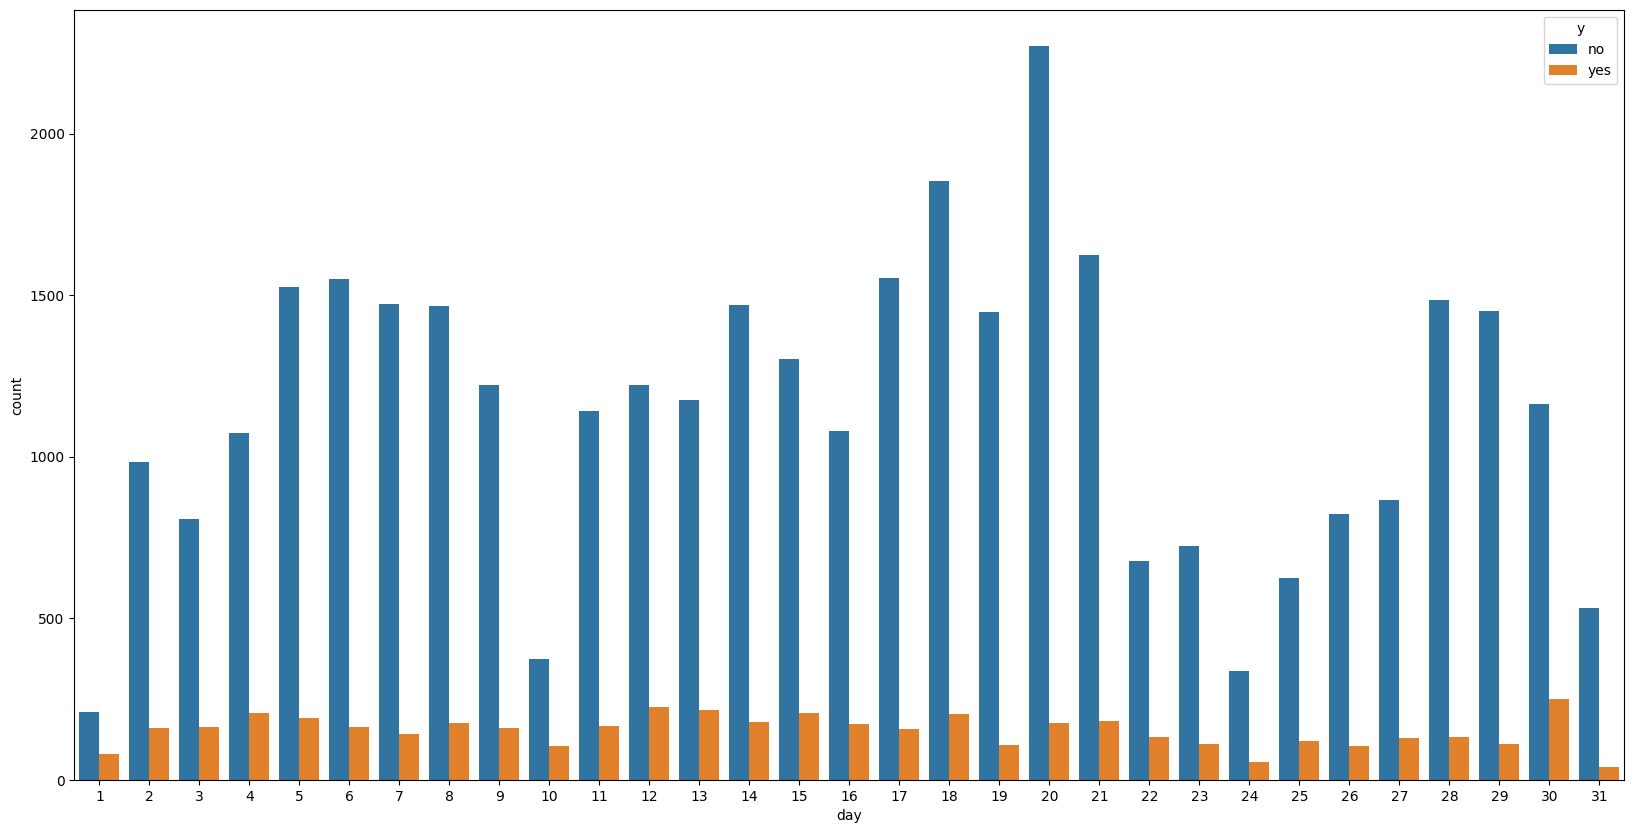

In [28]:
# 種類：　
# yes 平均値：15日、標準偏差：8.5日、最大値：　　31日、最小値：　1日　(target層)
# no　　　平均値：15日、標準偏差：8.3日、最大値：　　31日、最小値：　1日

fig= plt.subplots(figsize=(20,10))
sns.countplot(x='day',hue='y',data=train);

##### 2.11 month：年の最後の連絡月（月）

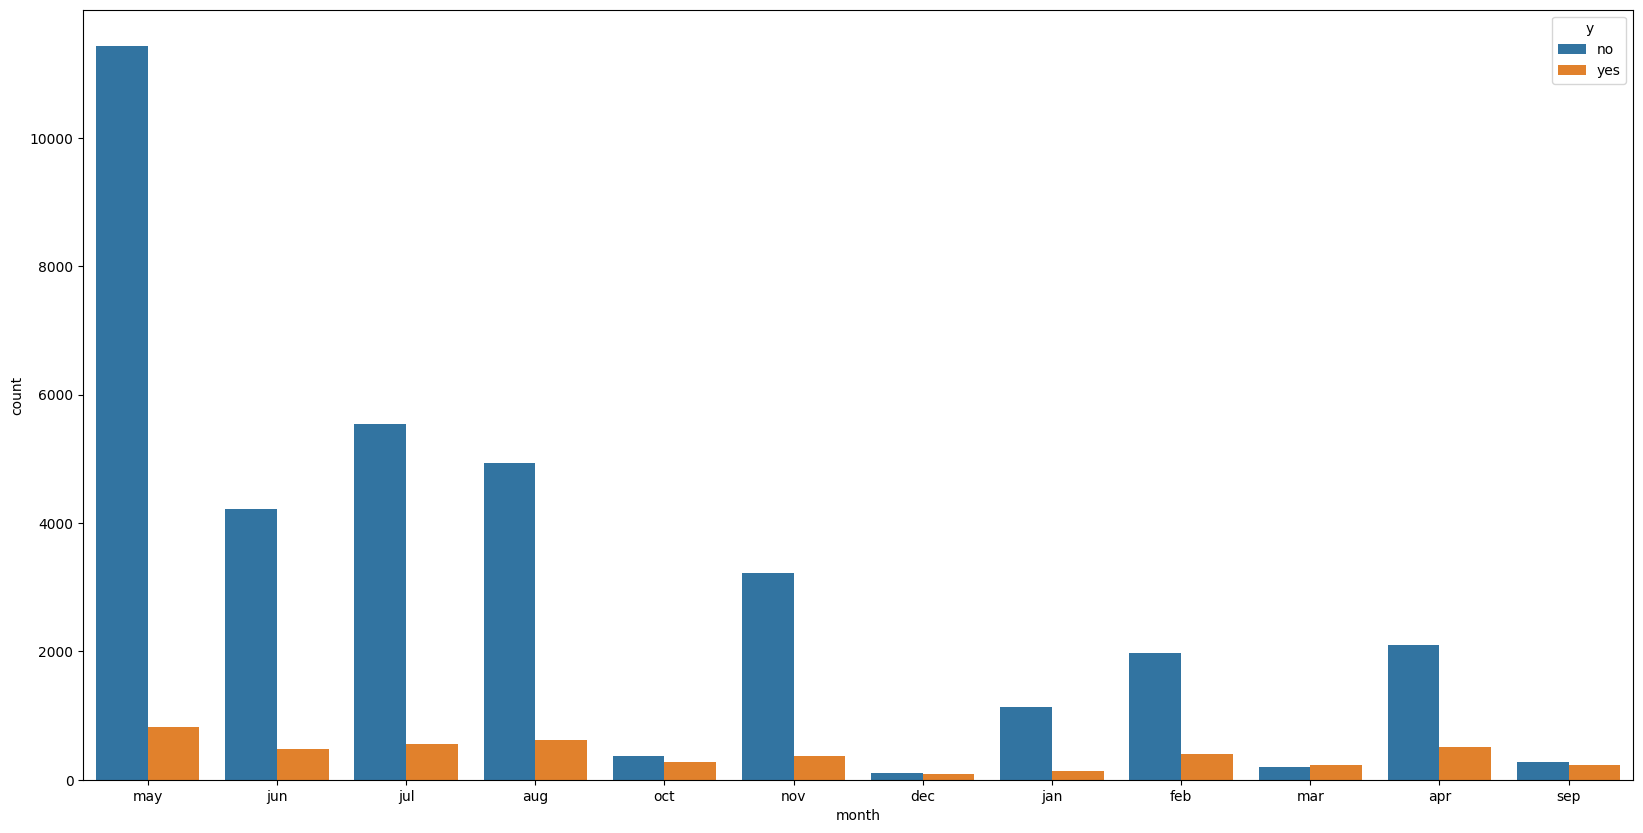

In [29]:
# 種類：　
# yes 平均値：15日、標準偏差：8.5日、最大値：　　31日、最小値：　1日　(target層)
# no　　　平均値：15日、標準偏差：8.3日、最大値：　　31日、最小値：　1日

fig= plt.subplots(figsize=(20,10))
sns.countplot(x='month',hue='y',data=train);
#3,9,10,12はyesが多い傾向があるが、n数も少ない

#### 2.12 duration：最後の連絡期間（秒単位）

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/1593420541.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['y']=='no']['duration'],kde=False,label='no',color="blue")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/1593420541.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

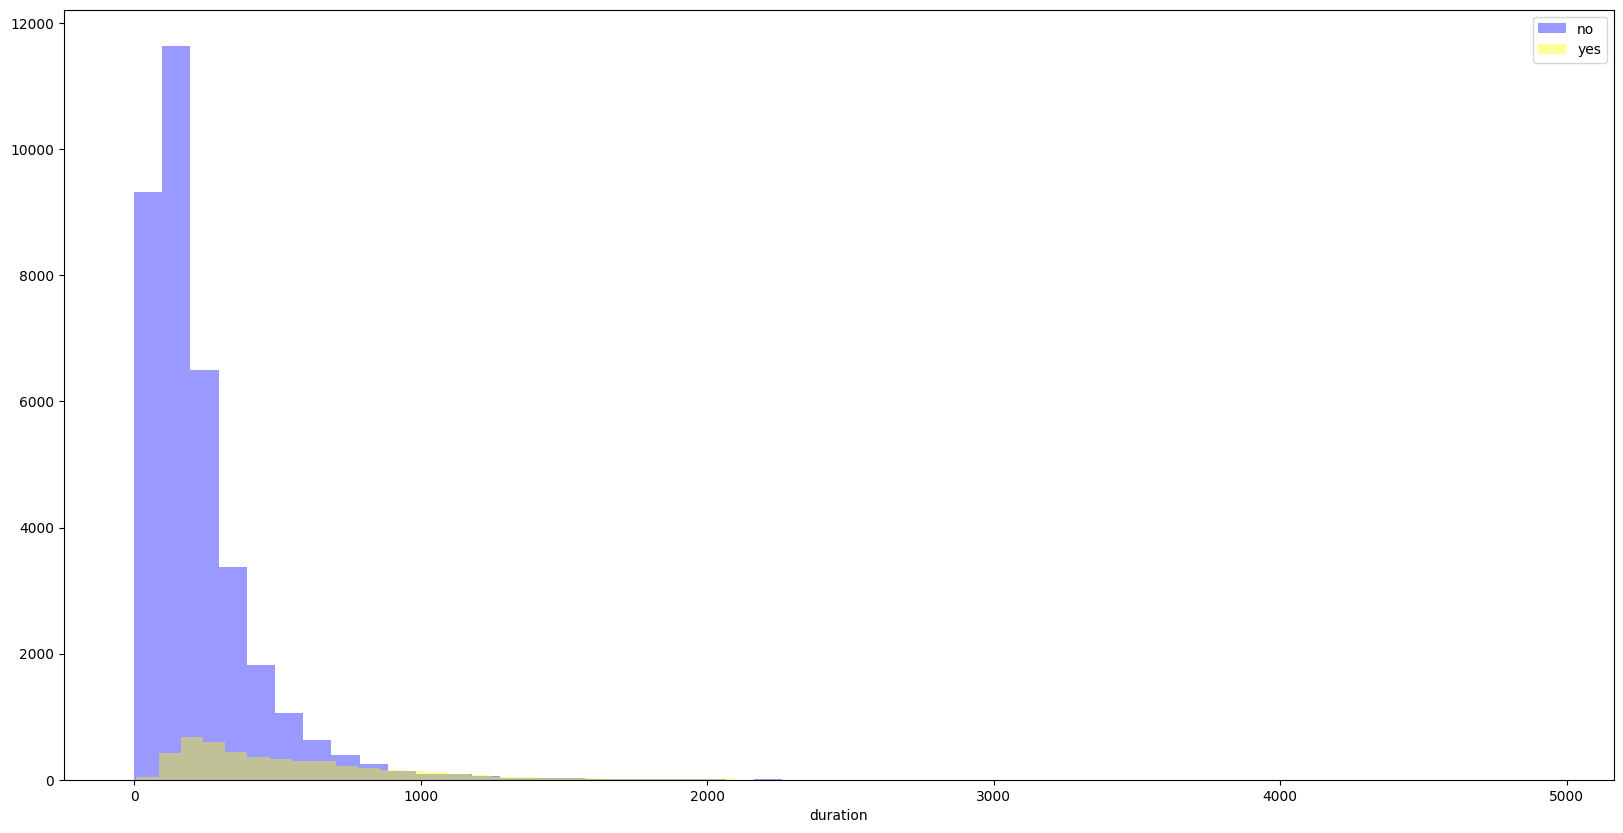

In [30]:
# 種類：　
# yes 平均値：539秒、標準偏差：394秒、最大値：　3881秒、最小値：　8秒　(target層)
# no　　　平均値：221秒、標準偏差：208秒、最大値：　4918秒、最小値：　0秒
fig= plt.subplots(figsize=(20,10))
sns.distplot(train[train['y']=='no']['duration'],kde=False,label='no',color="blue")
sns.distplot(train[train['y']=='yes']['duration'],kde=False,label='yes',color="yellow")
plt.legend();
#durationが高いほどyesが多くなる傾向

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/1430468270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train[train['y']=='no']['duration']+1),kde=False,label="no",color="blue")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/1430468270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

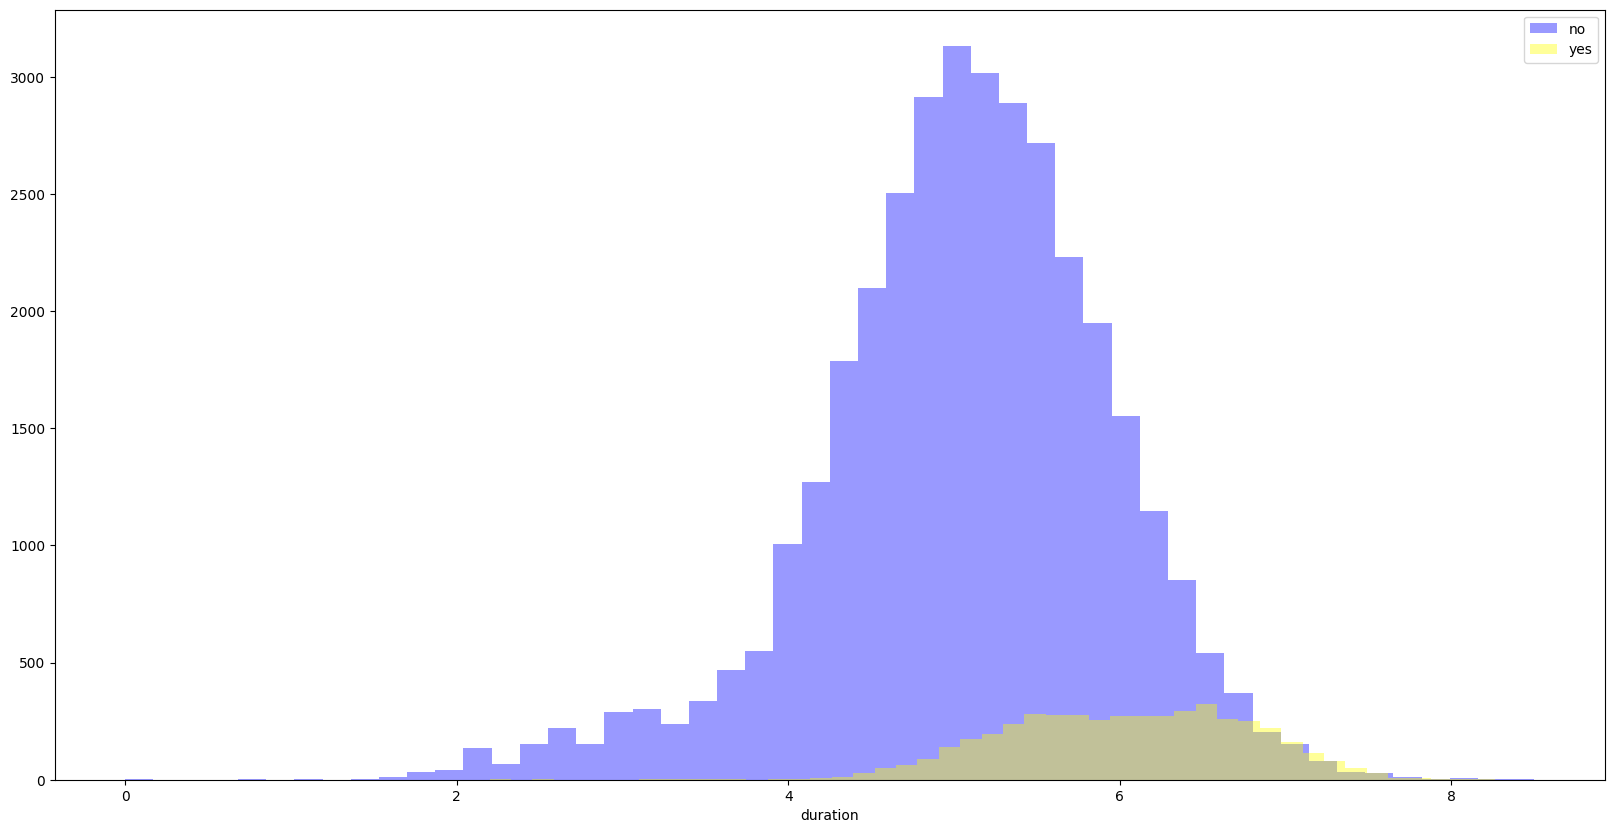

In [31]:
#11. duration:最後の接触時間（秒） (圧縮図：balanceの数値が大きいため対数変換するとグラフの偏りが少なくなる)
fig= plt.subplots(figsize=(20,10))
sns.distplot(np.log(train[train['y']=='no']['duration']+1),kde=False,label="no",color="blue")
sns.distplot(np.log(train[train['y']=='yes']['duration']+1),kde=False,label="yes",color="yellow")
plt.legend();

#### 2.13 campaign：このダイレクトマーケティングキャンペーン中(電話)にこのクライアントに対して実行された連絡先の数

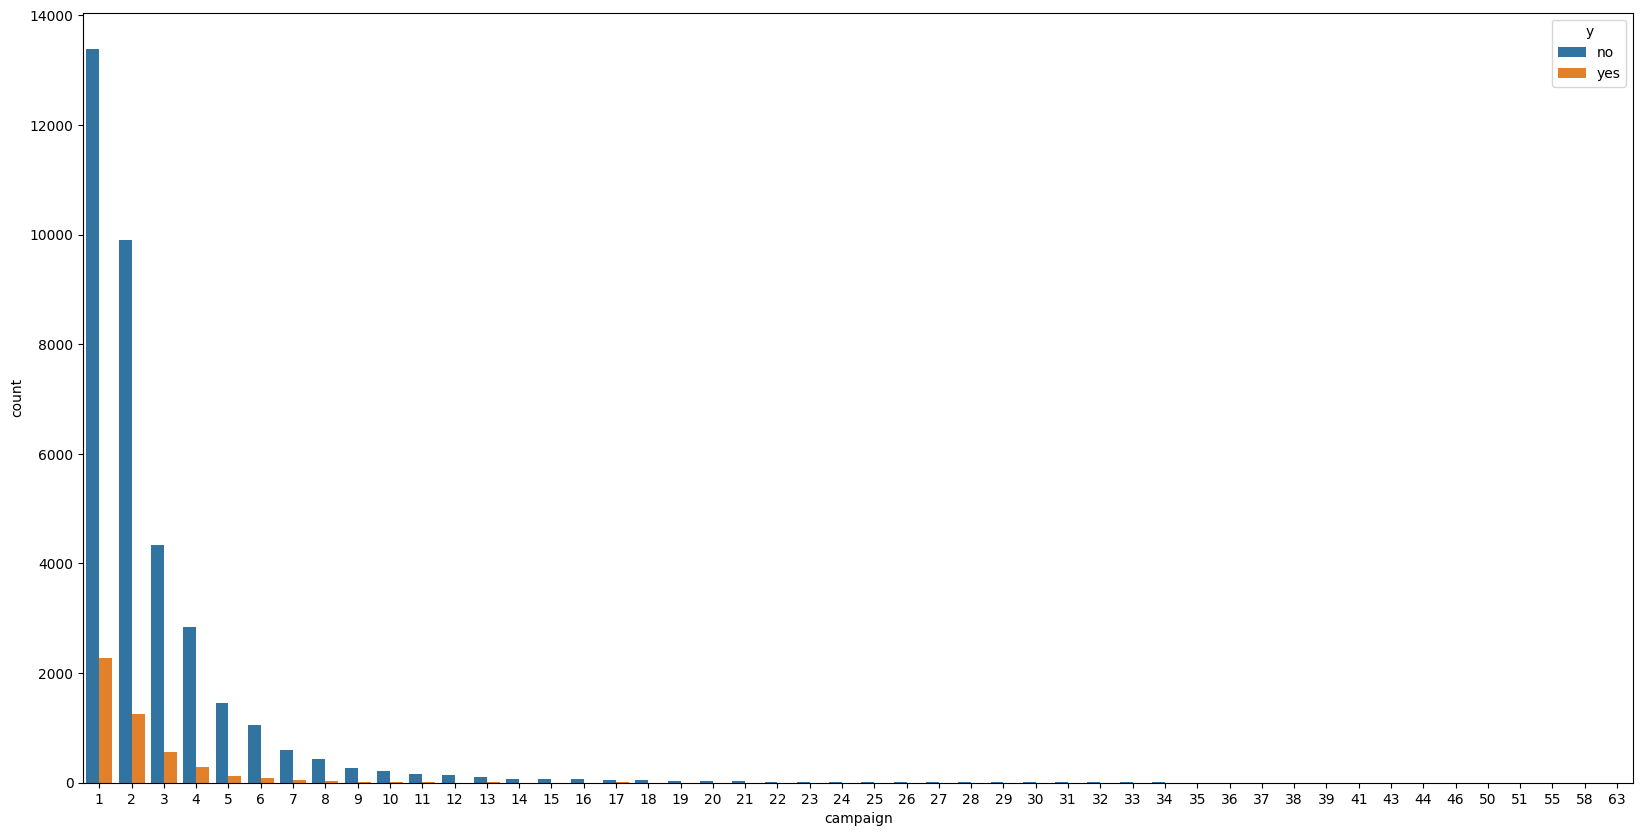

In [32]:
# 種類：　
# yes 平均値：2.1、標準偏差：1.9、最大値：　　32、最小値：　1　(target層)
# no　　　平均値：2.8、標準偏差：3.2、最大値：　　63、最小値：　1
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='campaign',hue='y',data=train);
#平均値で見るとcampaignが多いほどnoが多くなる傾向があるようにみえるが、外れ値の影響かも

#### 2.14 pdays：クライアントが前のキャンペーンから最後に連絡されてから経過した日数
（数値、-1はクライアントが以前に連絡されていないことを意味します）

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3044757450.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['y']=='no']['pdays'],kde=False,label='no',color="blue")
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3044757450.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

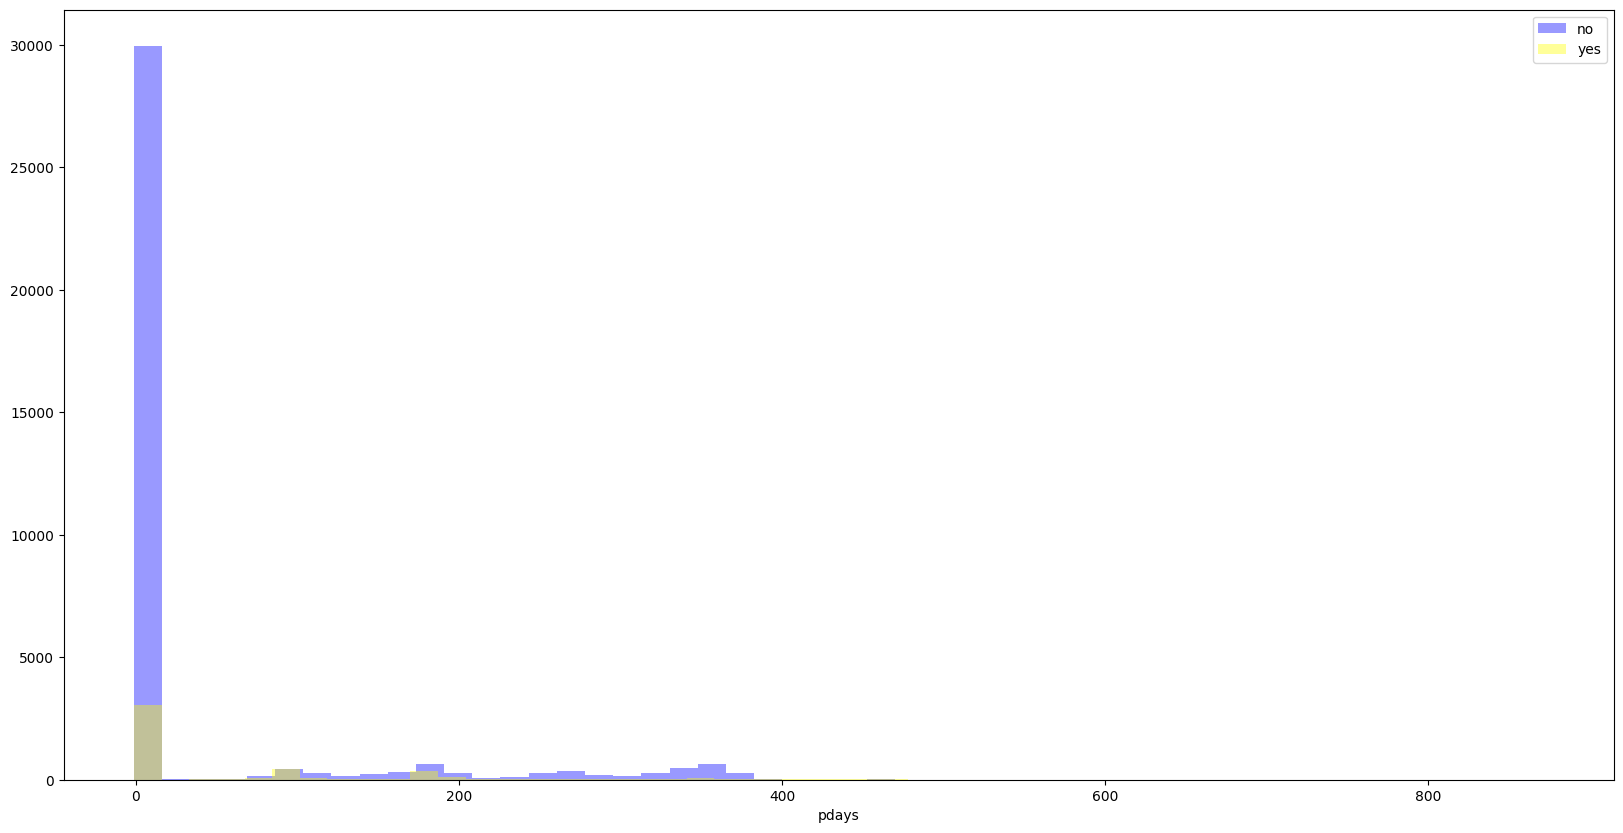

In [33]:
# 種類：　
# yes 平均値：68日、標準偏差：118日、最大値：854日、最小値：-1　(target層)
# no　　　平均値：36日、標準偏差： 96日、最大値：871日、最小値：-1
fig= plt.subplots(figsize=(20,10))
sns.distplot(train[train['y']=='no']['pdays'],kde=False,label='no',color="blue")
sns.distplot(train[train['y']=='yes']['pdays'],kde=False,label='yes',color="yellow")
plt.legend();

In [34]:
#最後に連絡をしたか否かで2値変数に変換してみる
train["pdays"]=train["pdays"].apply(lambda x:0 if x==-1 else 1)
train.groupby(["pdays","y"]).count()["ID"]
#連絡をされた人の方がyesが多い傾向

pdays  y  
0      no     29822
       yes     3028
1      no      5677
       yes     1684
Name: ID, dtype: int64

#### 2.15 previous：このキャンペーンの前に、このクライアントに対して実行された連絡先の数

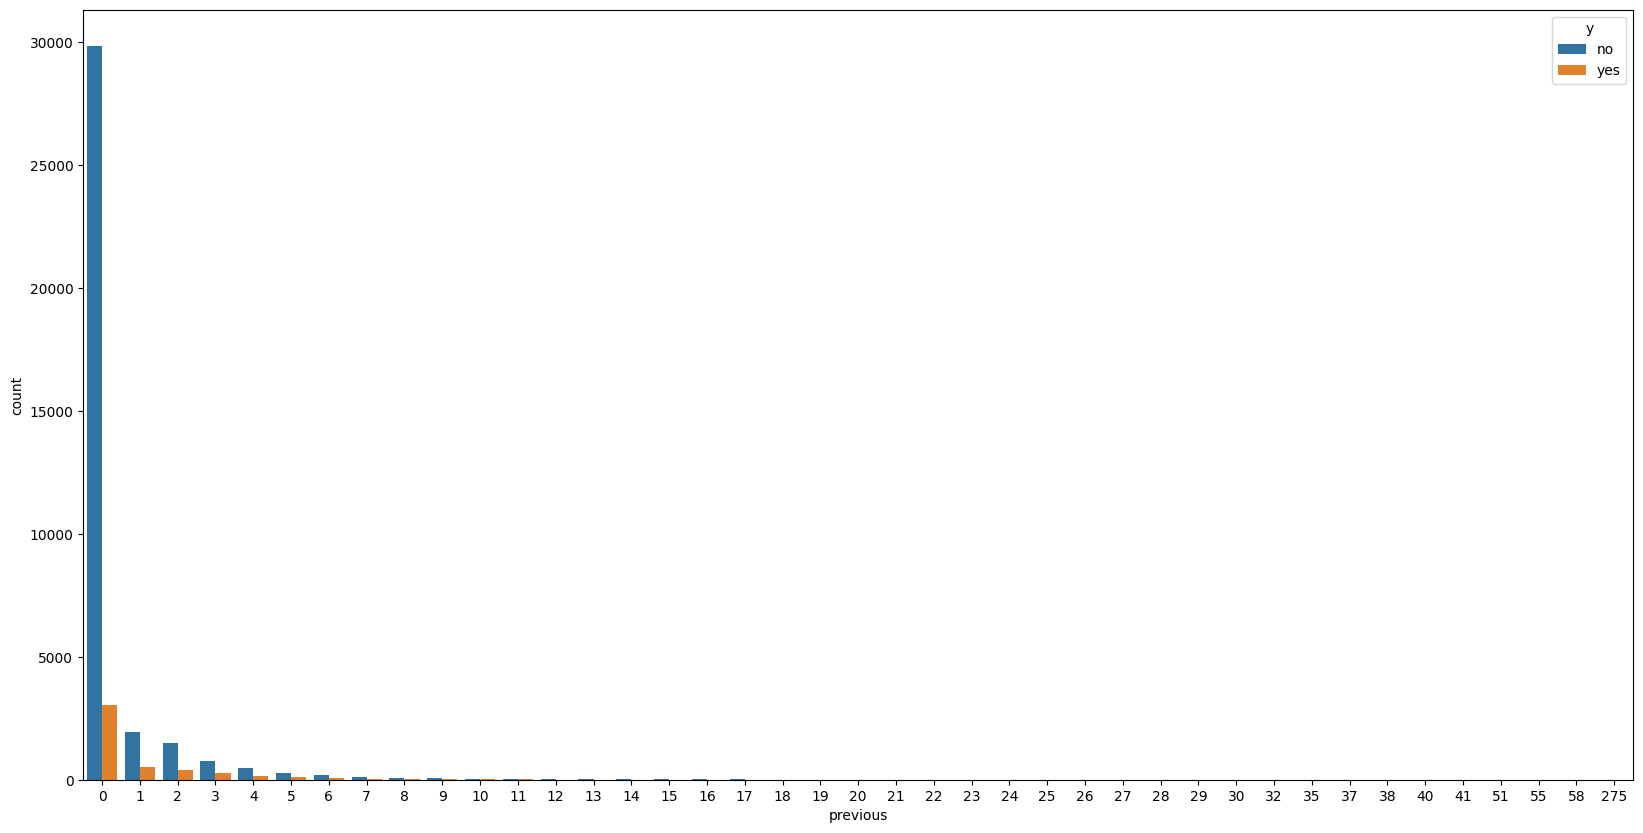

In [35]:
# 種類：　
# yes 平均値：1.1、標準偏差：2.5、最大値：　　58、 最小値：　0　(target層)
# no　　　平均値：0.5、標準偏差：2.3、最大値：　　275、最小値：　0
fig= plt.subplots(figsize=(20,10))
sns.countplot(x='previous',hue='y',data=train);
#previousが多い方がyesが多い傾向

#### 2.16 poutcome：以前のマーケティングキャンペーンの結果

poutcome  y  
failure   no      3839
          yes      549
other     no      1370
          yes      268
success   no       465
          yes      865
unknown   no     29825
          yes     3030
Name: ID, dtype: int64

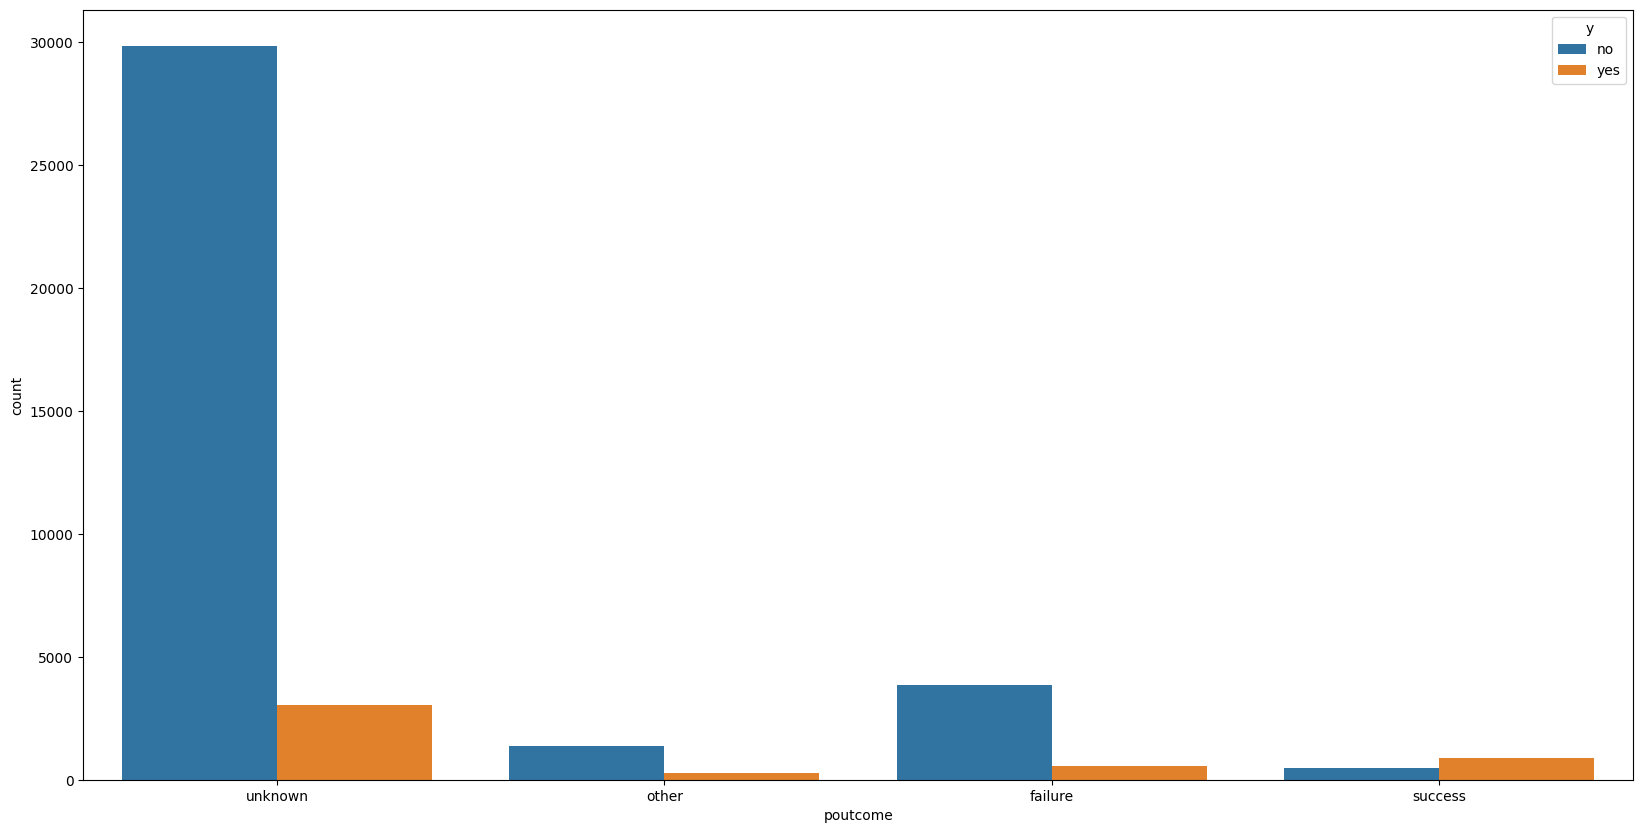

In [36]:
# 種類：　
# yes 平均値：41.6歳、標準偏差：13.4歳、最大値：　　95歳、最小値：　18歳　(target層)
# no　　　平均値：　40.8歳、標準偏差：10.1歳、最大値：　　95歳、最小値：　18歳
# unknow：不明, other：その他, failure:失敗、success：成功

fig= plt.subplots(figsize=(20,10))
sns.countplot(x='poutcome',hue='y',data=train);
train.groupby(["poutcome","y"]).count()["ID"]
#successはyesが多い傾向

### 3.データ前処理

#### 3.1関数定義

In [37]:
# 1.提出に使用する関数
def submit(df, pred):
  df['y'] = pred
  df = pd.concat([df['ID'], df['y']], axis=1)
  df = df.set_index('ID')
  return df

### 3.2前処理

#### 3.2.1 前処理

In [38]:
#0. year：年を追加
df.loc[0:27728, 'year'] = int(2008) #2008年 0:27728
df.loc[27729:42590, 'year'] = int(2009) #2009年 27729:42590
df.loc[42591:45210, 'year'] = int(2010) #2010年 42591:45210

# allデータからtrainとtestに分割
train = df[df['y'].notnull()]
test = df[df['y'].isnull()].drop('y',axis=1)

#1.age：：年齢
# 新特徴量追加
#1.1 「senior」61歳以上
train['age'] = train['age'].map(lambda x: 1 if x > 60 else 0)
test['age'] = test['age'].map(lambda x: 1 if x > 60 else 0)


#2.job：仕事
train['job']=train['job'].map(lambda x: 1 if x=="blue-collar" else 0)
test['job']=test['job'].map(lambda x: 1 if x=="blue-collar" else 0)

#3.marital:婚姻
train['marital'] = train['marital'].map({"married":0, "single":1, "divorced":0})
test['marital'] = test['marital'].map({"married":0, "single":1, "divorced":0})


#4.educatio：教育
train['education'] = train['education'].map({"secondary":0, "tertiary":1, "primary":0, "unknown":0})
test['education'] = test['education'].map({"secondary":0, "tertiary":1, "primary":0, "unknown":0})


#5.default：債務整理者
train['default'] = train['default'].map({"no":0, "yes":1})
test['default'] = test['default'].map({"no":0, "yes":1})


#6.balance：年間残高 
train['balance'] = train['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x)+1))
test['balance'] = test['balance'].map(lambda x: np.sign(x) * np.log(np.abs(x)+1))


#7.housing：住宅ローン
train['housing'] = train['housing'].map({"no":0, "yes":1})
test['housing'] = test['housing'].map({"no":0, "yes":1})


#8.loan：ローンの有無
train['loan'] = train['loan'].map({"no":0, "yes":1})
test['loan'] = test['loan'].map({"no":0, "yes":1})

#9.contact：連絡手段の通信手段
train['contact'] = train['contact'].map({"cellular":1, "telephone":0, "unknown":0})
test['contact'] = test['contact'].map({"cellular":1, "telephone":0, "unknown":0})

#10.day：月の最後の連絡日（日） -> no　processing


#11.month:年の最後の連絡月（月）
train['month'] = train['month'].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})
test['month'] = test['month'].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})


# 新特徴量追加
#「date」：日付追加
train['date'] = pd.to_datetime(
    {'year': train['year'], 'month': train['month'], 'day': train['day']}
    )
test['date'] = pd.to_datetime(
    {'year': test['year'], 'month': test['month'], 'day': test['day']}
    )


#12.duration：最後の連絡期間（秒） 
train['duration'] = np.log(train['duration']+1)
test['duration'] = np.log(test['duration']+1)

#13.campaign：このダイレクトマーケティングキャンペーン中(電話)にこのクライアントに対して実行された連絡先の数 -> no processing


#14.pdays：pdays：クライアントが前のキャンペーンから最後に連絡されてから経過した日数
train['pdays']=train['pdays'].map(lambda x: 0 if x==-1 else 1)
test['pdays']=test['pdays'].map(lambda x: 0 if x==-1 else 1)


#15.previous -> no processing


#16.poutcome
train["poutcome"]=train["poutcome"].map({"failure":0, "success":1, "other":0, "unknown":0})
test["poutcome"]=test["poutcome"].map({"failure":0, "success":1, "other":0, "unknown":0})


#17.y
train["y"]=train["y"].map({"no":0, "yes":1})

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3764714480.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'] = train['age'].map(lambda x: 1 if x > 60 else 0)
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3764714480.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['job']=train['job'].map(lambda x: 1 if x=="blue-collar" else 0)
/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/3764714480.py:22: SettingWithCopyWarning: 
A value is try

In [39]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         40211 non-null  int64         
 1   age        40211 non-null  int64         
 2   job        40211 non-null  int64         
 3   marital    40211 non-null  int64         
 4   education  40211 non-null  int64         
 5   default    40211 non-null  int64         
 6   balance    40211 non-null  float64       
 7   housing    40211 non-null  int64         
 8   loan       40211 non-null  int64         
 9   contact    40211 non-null  int64         
 10  day        40211 non-null  int64         
 11  month      40211 non-null  int64         
 12  duration   40211 non-null  float64       
 13  campaign   40211 non-null  int64         
 14  pdays      40211 non-null  int64         
 15  previous   40211 non-null  int64         
 16  poutcome   40211 non-null  int64        

/var/folders/vy/t5c040x12rz4tbq3x_f1mj0r0000gn/T/ipykernel_51843/2697755933.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(method="spearman"), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', ax=ax)


<AxesSubplot: >

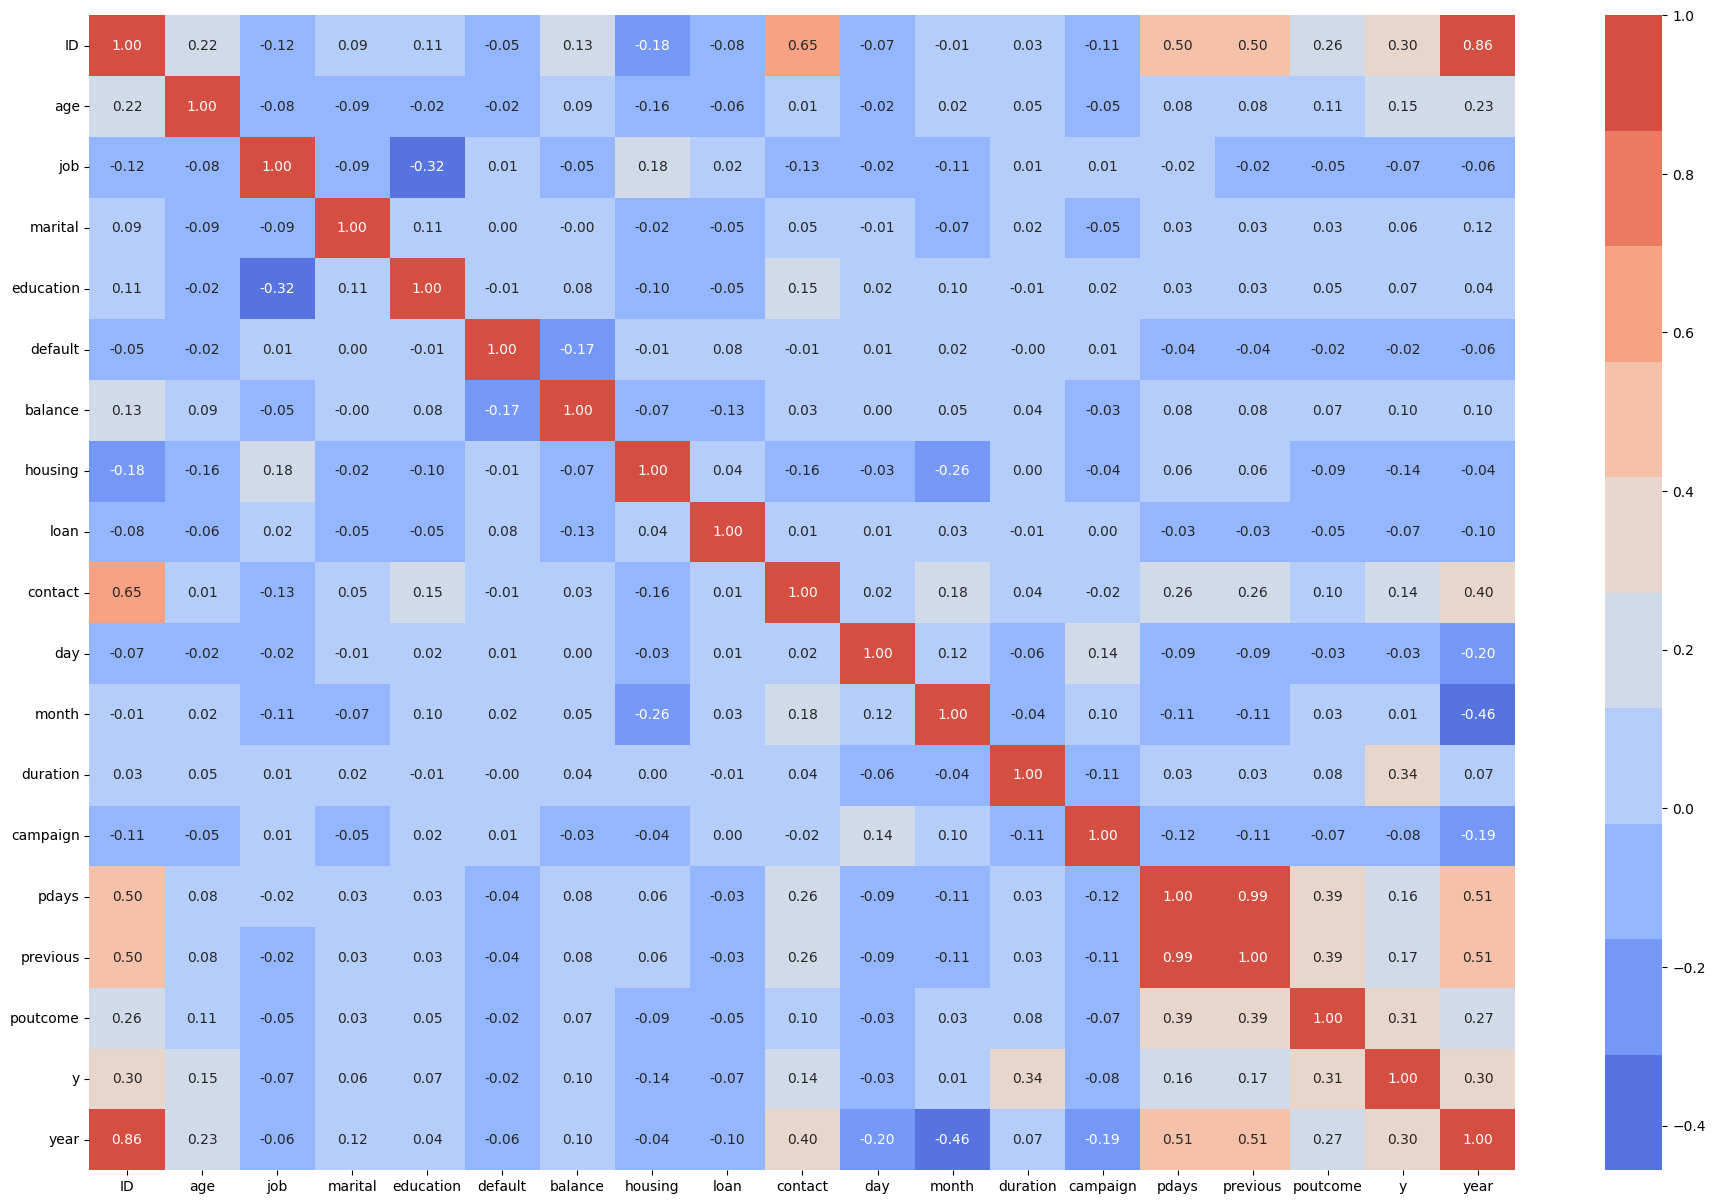

In [40]:
# 1.データ全ての相関図（heatmap）
fig, ax = plt.subplots(figsize=(23,15))
sns.heatmap(train.corr(method="spearman"), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', ax=ax)

#### 3.2.2 不要なカラムdrop

In [41]:
# 相関があるものについてはdrop
#　目的変数(tran_x), 説明変数(train_y)に分ける
#目的変数
train_x = train.drop(['ID', 'date', 'pdays', 'day', 'month', 'year' ,'y'], axis=1)
#説明変数
train_y = train['y']

test_x = test.drop(['ID', 'date',"pdays", 'day', 'month', 'year'], axis=1) #testデータにyはなし

#### 3.2.3 trainデータを訓練データ・評価データに分割

In [42]:
#データ分割コード
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_x , train_y ,test_size=0.2,random_state=1)

### 4.機械学習,精度評価,submit

#### ① 学習+評価

In [43]:
#ロジスティック回帰(sklearn)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l1",solver="liblinear",C=0.1) #C値で正則化の強さを調整(低いほど強い)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_val)
y_pred_proba=lr.predict_proba(X_val)[:, 1]

#スコア算出
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,log_loss

print('confusion matrix = \n', confusion_matrix(y_true=y_val, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_val, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_val, y_pred=y_pred))
print("log_loss=",log_loss(y_val,y_pred_proba))
pd.DataFrame(lr.coef_,columns=train_x.columns)

confusion matrix = 
 [[6931  165]
 [ 651  296]]
accuracy =  0.8985453189108542
f1 score =  0.42045454545454547
log_loss= 0.24322773692074087


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome
0,1.136766,-0.222979,0.392738,0.14288,0.0,0.050567,-0.72673,-0.421703,0.786168,1.726964,-0.066772,0.040612,2.451053


In [44]:
#標準化偏回帰係数の算出
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X_train)
X_train_std=pd.DataFrame(X_std,columns=X_train.columns)

lr = LogisticRegression(penalty="l1",solver="liblinear",C=0.1) 
lr.fit(X_train_std, y_train)
pd.DataFrame(lr.coef_,columns=train_x.columns)
#duration、poutcome、contactの順に予測に有効(最後に長い時間接触しており、以前のキャンペーンに成約歴があり、携帯電話で連絡を取っていた方)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome
0,0.198803,-0.093102,0.187517,0.072231,-0.013752,0.192015,-0.358547,-0.159906,0.394275,1.644667,-0.187794,0.092864,0.454036


#### ② ベースラインモデル

In [45]:
#ベースラインモデル(accuracy)
1-np.mean(y_val)
#全部0だと予測した場合のaccuracyは88.3%

0.8822578639811016

#### ③ 予測

In [46]:
pred = lr.predict_proba(test_x)[:,1] # 1になる確率

In [49]:
pre = lr.predict_proba(test_x)

In [64]:
pre

array([[6.12386676e-03, 9.93876133e-01],
       [2.51533216e-03, 9.97484668e-01],
       [8.82141282e-03, 9.91178587e-01],
       ...,
       [1.35205301e-03, 9.98647947e-01],
       [2.12601710e-04, 9.99787398e-01],
       [3.66058784e-04, 9.99633941e-01]])

In [59]:
pre[0]

array([0.00612387, 0.99387613])

In [60]:
pre[1]

array([0.00251533, 0.99748467])

In [62]:
pre[:,0]

array([0.00612387, 0.00251533, 0.00882141, ..., 0.00135205, 0.0002126 ,
       0.00036606])

In [63]:
pre[:,1]

array([0.99387613, 0.99748467, 0.99117859, ..., 0.99864795, 0.9997874 ,
       0.99963394])

In [54]:
pre[:,1].shape

(5000,)

#### ④ 提出

In [47]:
#　予想したpredを提出用データフレームへ変換
df = submit(test, pred)
df

,y
ID,
4,0.993876
19,0.997485
25,0.991179
29,0.987685
35,0.999568
...,...
45159,0.999929
45169,0.999930
45174,0.998648


In [48]:
df.to_csv("Portugal_submit.csv",index=True)
#AUC=0.852